In [1]:
"""
Purpose: To test the visualizations 
of just takig the average of node features

Psueodocode: 
1) Get the all batch data
2) Average across all of the batches
3) Plot with the given labels

"""

'\nPurpose: To test the visualizations \nof just takig the average of node features\n\nPsueodocode: \n1) Get the all batch data\n2) Average across all of the batches\n3) Plot with the given labels\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [115]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/meshAfterParty")
sys.path.append("/python_tools/python_tools")
sys.path.append("/machine_learning_tools/machine_learning_tools/")
sys.path.append("/graph_tools/graph_tools/")
sys.path.append("/neuron_morphology_tools/neuron_morphology_tools/")
sys.path.append("/pytorch_tools/pytorch_tools/")

import datajoint_utils as du
from importlib import reload

In [4]:
from microns_morphology_api.schemas import minnie65_morphology as m65mor
m65mor.config.register_adapters(context=locals())
m65mor.config.register_externals()

from microns_morphology_api.schemas import minnie65_auto_proofreading as m65auto
m65auto.config.register_adapters(context=locals())
m65auto.config.register_externals()

In [5]:
from dataInterfaceMinnie65 import data_interface as hdju

In [6]:
import neuron_nx_utils as nxu
import networkx_utils as xu
import morphopy_utils as mpu

In [7]:
import dimensionality_reduction_ml as dru
import preprocessing_ml as preml
import pandas_ml as pdml
import pandas_utils as pu
import visualizations_ml as vml
import system_utils as su

In [8]:
#python_tools modules
import system_utils as su
import pandas_utils as pu
import pandas as pd
import numpy as np
import numpy_utils as nu
import networkx_utils as xu
from tqdm_utils import tqdm

#neuron_morphology_tools modules
import neuron_nx_io as nxio

# Loading the Data

In [84]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"device = {device}")

device = cpu


In [9]:
with_skeleton = False

features_to_delete = [
    "mesh_volume",
    "apical_label",
    "basal_label",
]

if not with_skeleton:
    features_to_delete +=[
        "skeleton_vector_downstream_phi",      
        "skeleton_vector_downstream_theta",    
        "skeleton_vector_upstream_phi",        
        "skeleton_vector_upstream_theta",  
    ]

features_to_keep = None

In [10]:
import system_utils as su
data_path = Path("./data/m65_full/")
#list(data_path.iterdir())

gnn_task = "cell_type_fine"
label_name = None
graph_label = "cell_type_fine_label"
data_file = "df_cell_type_fine.pbz2"

data_filepath = Path(data_path) / Path(data_file)

data_df = su.decompress_pickle(data_filepath)
data_df

segment_id  split_index  nucleus_id external_layer  \
0      864691134277239760            0       89719        LAYER_6   
1      864691134339067925            0      624899        LAYER_6   
2      864691134366116139            0      476756   WHITE_MATTER   
3      864691134378215335            0        3799      LAYER_2/3   
4      864691134527727930            0      631380   WHITE_MATTER   
...                   ...          ...         ...            ...   
60448  864691137197334593            0      376218        LAYER_6   
60449  864691137197344065            0      191436      LAYER_2/3   
60450  864691137197345345            0      584463      LAYER_2/3   
60451  864691137197353281            0      591241        LAYER_5   
60452  864691137197364801            0      488097      LAYER_2/3   

      external_visual_area                                     cell_type_fine  \
0                       V1  [{'nodelist': ['L0_0'], 'features': ['mesh_vol...   
1                       AL  [{'nodelist': ['L0_1', 'L0_0', 'L0_2'], 'featu...   
2                       RL  [{'nodelist': ['L0_6'], 'features': ['mesh_vol...   
3                       V1  [{'nodelist': ['L0_1', 'L0_0', 'L0_2'], 'featu...   
4                       RL  [{'nodelist': ['L0_0'], 'features': ['mesh_vol...   
...                    ...                                                ...   
60448                   V1  [{'nodelist': ['L0_0', 'L0_1', 'L0_2', 'L0_5',...   
60449                   V1  [{'nodelist': ['L0_0', 'L0_1', 'L0_4', 'L0_6',...   
60450                   RL  [{'nodelist': ['L0_13', 'L4_5', 'L0_8', 'L2_5'...   
60451                   RL  [{'nodelist': ['L4_6', 'L1_10', 'L3_4', 'L0_10...   
60452                   RL  [{'nodelist': ['L0_9', 'L0_8', 'L0_10', 'L0_6'...   

      cell_type_fine_label  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
60448                  NaN  
60449                  NaN  
60450                  NaN  
60451                  NaN  
60452                  NaN  

[60453 rows x 7 columns]

In [11]:
x_list = []
y_list = data_df[graph_label].to_list()
for gnn_info in data_df[gnn_task].to_list():
    x = nxio.feature_df_from_gnn_info(
        gnn_info[0],
        return_data_labels_split = False)
    x_list.append(x)

In [12]:
df_mean_features = pd.concat([k.mean() for k in x_list],axis=1).T
df_mean_features

mesh_volume   n_spines  n_synapses_head  n_synapses_neck  \
0        38.331768   0.000000         0.000000         0.000000   
1        12.668272   0.000000         0.000000         0.000000   
2         5.177527   0.000000         0.000000         0.000000   
3         7.664839   0.000000         0.000000         0.000000   
4        24.522745   0.000000         0.000000         0.000000   
...            ...        ...              ...              ...   
60448  1742.106571  14.363636         9.545455         0.136364   
60449  1327.281437  27.066667        12.888889         0.555556   
60450  2531.083995  34.970149        20.208955         1.388060   
60451   699.817346   3.817204         2.172043         0.258065   
60452   614.315681   9.095238         8.047619         0.285714   

       n_synapses_post  n_synapses_pre  skeletal_length  total_spine_volume  \
0             0.000000        0.000000      4218.736339        0.000000e+00   
1             0.000000        0.000000      4330.474477        0.000000e+00   
2             0.000000        0.000000      3206.663214        0.000000e+00   
3             0.000000        0.000000      1835.836478        0.000000e+00   
4             0.000000        3.000000      4493.930145        0.000000e+00   
...                ...             ...              ...                 ...   
60448        29.022727        0.409091     40225.071793        3.285510e+09   
60449        48.688889        0.266667     36129.369549        5.423866e+09   
60450        73.940299        0.238806     56240.411769        9.597279e+09   
60451        55.215054        0.365591     32355.196705        6.064745e+08   
60452        18.190476        0.047619     21799.864540        2.982361e+09   

       width_upstream  width_downstream  apical_label  basal_label  \
0         1033.341211        895.524963      0.000000     1.000000   
1          242.740854        458.988261      0.000000     1.000000   
2          531.441932        366.946082      0.000000     1.000000   
3          646.265925        621.255990      0.000000     1.000000   
4         1590.580997       1427.002798      0.000000     1.000000   
...               ...               ...           ...          ...   
60448      428.427795        396.536893      0.522727     0.477273   
60449      457.316744        484.810322      0.333333     0.666667   
60450      528.075821        476.483935      0.462687     0.537313   
60451      334.447591        319.793766      0.000000     0.000000   
60452      421.250102        450.770922      0.309524     0.690476   

       skeleton_vector_downstream_phi  skeleton_vector_downstream_theta  \
0                            1.301845                          1.421399   
1                            1.197327                          1.442915   
2                           -0.809102                          1.300793   
3                           -0.591096                          1.520675   
4                           -2.036848                          1.493445   
...                               ...                               ...   
60448                       -0.447277                          1.871510   
60449                        0.579261                          1.675562   
60450                       -0.112930                          1.759388   
60451                       -0.205154                          1.564871   
60452                       -0.202555                          1.536233   

       skeleton_vector_upstream_phi  skeleton_vector_upstream_theta  \
0                          1.283103                        1.385306   
1                         -0.801018                        1.604856   
2                         -0.886743                        1.278941   
3                         -0.612847                        1.517428   
4                         -2.410269                        1.731865   
...                             ...                             ...   
60448         

In [13]:

label_name = "cell_type_fine_label"
df_mean_features[label_name] = y_list
df_mean_features

mesh_volume   n_spines  n_synapses_head  n_synapses_neck  \
0        38.331768   0.000000         0.000000         0.000000   
1        12.668272   0.000000         0.000000         0.000000   
2         5.177527   0.000000         0.000000         0.000000   
3         7.664839   0.000000         0.000000         0.000000   
4        24.522745   0.000000         0.000000         0.000000   
...            ...        ...              ...              ...   
60448  1742.106571  14.363636         9.545455         0.136364   
60449  1327.281437  27.066667        12.888889         0.555556   
60450  2531.083995  34.970149        20.208955         1.388060   
60451   699.817346   3.817204         2.172043         0.258065   
60452   614.315681   9.095238         8.047619         0.285714   

       n_synapses_post  n_synapses_pre  skeletal_length  total_spine_volume  \
0             0.000000        0.000000      4218.736339        0.000000e+00   
1             0.000000        0.000000      4330.474477        0.000000e+00   
2             0.000000        0.000000      3206.663214        0.000000e+00   
3             0.000000        0.000000      1835.836478        0.000000e+00   
4             0.000000        3.000000      4493.930145        0.000000e+00   
...                ...             ...              ...                 ...   
60448        29.022727        0.409091     40225.071793        3.285510e+09   
60449        48.688889        0.266667     36129.369549        5.423866e+09   
60450        73.940299        0.238806     56240.411769        9.597279e+09   
60451        55.215054        0.365591     32355.196705        6.064745e+08   
60452        18.190476        0.047619     21799.864540        2.982361e+09   

       width_upstream  width_downstream  apical_label  basal_label  \
0         1033.341211        895.524963      0.000000     1.000000   
1          242.740854        458.988261      0.000000     1.000000   
2          531.441932        366.946082      0.000000     1.000000   
3          646.265925        621.255990      0.000000     1.000000   
4         1590.580997       1427.002798      0.000000     1.000000   
...               ...               ...           ...          ...   
60448      428.427795        396.536893      0.522727     0.477273   
60449      457.316744        484.810322      0.333333     0.666667   
60450      528.075821        476.483935      0.462687     0.537313   
60451      334.447591        319.793766      0.000000     0.000000   
60452      421.250102        450.770922      0.309524     0.690476   

       skeleton_vector_downstream_phi  skeleton_vector_downstream_theta  \
0                            1.301845                          1.421399   
1                            1.197327                          1.442915   
2                           -0.809102                          1.300793   
3                           -0.591096                          1.520675   
4                           -2.036848                          1.493445   
...                               ...                               ...   
60448                       -0.447277                          1.871510   
60449                        0.579261                          1.675562   
60450                       -0.112930                          1.759388   
60451                       -0.205154                          1.564871   
60452                       -0.202555                          1.536233   

       skeleton_vector_upstream_phi  skeleton_vector_upstream_theta  \
0                          1.283103                        1.385306   
1                         -0.801018                        1.604856   
2                         -0.886743                        1.278941   
3                         -0.612847                        1.517428   
4                         -2.410269                        1.731865   
...                             ...                             ...   
60448         

In [14]:
import pandas_utils as pu
keep_idx = pu.find_all_rows_without_nan(df_mean_features)
df_no_nan = df_mean_features.iloc[keep_idx,:]
df_no_nan

mesh_volume   n_spines  n_synapses_head  n_synapses_neck  \
115    3157.472760  29.510204        27.387755         1.122449   
147    2395.963716  24.957447        19.787234         0.872340   
170    1824.777875  22.159091        11.886364         0.386364   
205    5744.373331  39.342105        24.394737         0.789474   
213     624.507956  16.030303        11.757576         0.696970   
...            ...        ...              ...              ...   
60416  4304.036313  44.937500        35.062500         2.093750   
60417  1231.324269   5.934783         2.586957         0.391304   
60433  5852.538631   9.821429         6.142857         0.142857   
60442  4164.778997  27.358974        19.435897         0.666667   
60445  2671.799632   7.200000         4.760000         0.520000   

       n_synapses_post  n_synapses_pre  skeletal_length  total_spine_volume  \
115          54.265306        0.163265     63459.387871        9.915846e+09   
147          45.936170        0.340426     48878.785895        7.387531e+09   
170          40.090909        0.386364     44896.342922        4.077180e+09   
205          77.157895        0.394737     94343.592144        8.440558e+09   
213          44.393939        0.090909     33456.548997        4.028807e+09   
...                ...             ...              ...                 ...   
60416        78.625000        0.843750     75996.749394        1.362436e+10   
60417        86.782609        0.586957     53558.647234        9.234019e+08   
60433        28.500000        0.607143     93168.734903        1.749903e+09   
60442        66.102564        0.461538     79509.467579        6.878130e+09   
60445       101.040000        0.160000     61720.936854        1.064692e+09   

       width_upstream  width_downstream  apical_label  basal_label  \
115        354.012040        325.776855      0.387755     0.612245   
147        402.445356        382.128097      0.148936     0.851064   
170        370.587119        357.095115      0.477273     0.522727   
205        463.627233        436.203129      0.394737     0.605263   
213        430.065373        391.869997      0.000000     1.000000   
...               ...               ...           ...          ...   
60416      387.418975        346.260221      0.250000     0.750000   
60417      344.323951        341.275743      0.000000     0.000000   
60433      311.301899        316.368101      0.321429     0.678571   
60442      452.545315        400.128540      0.487179     0.512821   
60445      320.559810        351.620860      0.000000     0.000000   

       skeleton_vector_downstream_phi  skeleton_vector_downstream_theta  \
115                         -0.407786                          1.477198   
147                          0.133330                          1.725845   
170                         -0.890652                          1.608997   
205                         -0.521413                          1.404861   
213                          0.022357                          1.278431   
...                               ...                               ...   
60416                        0.683429                          1.487670   
60417                       -0.031499                          1.418151   
60433                        0.196067                          1.629841   
60442                       -0.360115                          1.424588   
60445                       -0.571634                          1.741424   

       skeleton_vector_upstream_phi  skeleton_vector_upstream_theta  \
115                       -0.339517                        1.586607   
147                        0.507438                        1.691387   
170                       -0.349807                        1.612648   
205                        0.346054                        1.503700   
213                       -0.241101                        1.364545   
...                             ...                             ...   
60416         

In [98]:
target_name="cell_type_fine_label"

In [100]:
import preprocessing_ml as preml
df_scaled = preml.scale_df(df_no_nan,target_name=target_name)
data_cols = [k for k in df_scaled if k != label_name and k not in features_to_delete]
df_scaled = df_scaled[data_cols + [target_name]]
df_scaled

n_spines  n_synapses_head  n_synapses_neck  n_synapses_post  \
0     0.539178         1.323001         0.691586        -0.000662   
1     0.108191         0.407493         0.223332        -0.435370   
2    -0.156715        -0.544192        -0.686516        -0.740441   
3     1.469915         0.962482         0.068189         1.194131   
4    -0.736897        -0.559705        -0.104998        -0.515861   
...        ...              ...              ...              ...   
3333  1.999603         2.247450         2.510060         1.270701   
3334 -1.692589        -1.664337        -0.677266         1.696456   
3335 -1.324660        -1.236017        -1.142409        -1.345385   
3336  0.335532         0.365174        -0.161731         0.617139   
3337 -1.572817        -1.402586        -0.436321         2.440567   

      n_synapses_pre  skeletal_length  total_spine_volume  width_upstream  \
0          -1.062140         0.354974            1.241310       -0.876252   
1          -0.138549        -0.667606            0.462150        0.077935   
2           0.100941        -0.946906           -0.558013       -0.549706   
3           0.144593         2.520972            0.786665        1.283281   
4          -1.439355        -1.749212           -0.572920        0.622078   
...              ...              ...                 ...             ...   
3333        2.485437         1.234255            2.384176       -0.218101   
3334        1.146693        -0.339394           -1.529924       -1.067117   
3335        1.251931         2.438576           -1.275219       -1.717686   
3336        0.492850         1.480612            0.305166        1.064956   
3337       -1.079163         0.233051           -1.486382       -1.535295   

      width_downstream  width_no_spine cell_type_fine_label  
0            -0.813146       -0.917685                   4P  
1             0.409388       -0.020771                  23P  
2            -0.133700       -0.669972                5P_IT  
3             1.582539        1.303412             IT_short  
4             0.620737        0.096989                  23P  
...                ...             ...                  ...  
3333         -0.368762        0.295574                   4P  
3334         -0.476900       -0.260505               Unsure  
3335         -1.017268       -1.600888                5P_NP  
3336          0.799905        0.791520                   6P  
3337         -0.252463       -0.566736                  BPC  

[3338 rows x 11 columns]

In [101]:
# -- mapping of the labels to integers --
total_labels,label_counts = np.unique((data_df.query(f"{graph_label}=={graph_label}")[
    graph_label]).to_numpy(),return_counts = True)
cell_type_map = {k:i+1 for i,k in enumerate(total_labels)}
cell_type_map[None] = 0
cell_type_map

{'1P': 1,
 '23P': 2,
 '4P': 3,
 '5P_IT': 4,
 '5P_NP': 5,
 '5P_PT': 6,
 '6CT': 7,
 '6P': 8,
 '6P_CT': 9,
 '6P_IT': 10,
 '6P_U': 11,
 'BC': 12,
 'BPC': 13,
 'I targeting non_bpc': 14,
 'IT_big_tuft': 15,
 'IT_short': 16,
 'IT_small_tuft': 17,
 'Martinotti': 18,
 'NGC': 19,
 'Pvalb': 20,
 'SST': 21,
 'Unsure': 22,
 'VIP': 23,
 'WM_P': 24,
 'cb1 basket': 25,
 'chandelier': 26,
 'l1vip': 27,
 'ndnf+npy_': 28,
 'ngfc': 29,
 'prox targeting': 30,
 'small basket': 31,
 None: 0}

In [102]:
#cell_type_map
cell_type_fine_classifier_weights = {
'23P': 0.25,#1294
'4P': 0.3,#890
'5P_IT': 0.5,#465
'6P': 0.8,#342
'6P_IT': 0.8,#263
'5P_PT': 0.8,#224
}


class_idx = np.array(list(cell_type_map.values()) )
class_labels = np.array(list(cell_type_map.keys()) )
weights = np.array([cell_type_fine_classifier_weights.get(k,1) for k in class_labels])
weights = weights[np.argsort(class_idx)]
weights

array([1.  , 1.  , 0.25, 0.3 , 0.5 , 1.  , 0.8 , 1.  , 0.8 , 1.  , 0.8 ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

# Creating the Custom Dataset

In [103]:
from torch.utils.data import Dataset, DataLoader
import torch

In [139]:
class MyDataset(Dataset):
    def __init__(self,):
        
        X,y = pdml.X_y(df_scaled,target_name="cell_type_fine_label")
        
        x=X.to_numpy().astype("float")
        y=y.to_numpy()
        
        y_int = [int(cell_type_map[k]) for k in y]

        self.x_train=torch.tensor(x,dtype=torch.float32)
        self.y_train=torch.tensor(y_int,dtype=torch.long)

    def __len__(self):
        return len(self.y_train)
  
    def __getitem__(self,idx):
        return self.x_train[idx],self.y_train[idx]
    
    @property
    def num_features(self):
        return self.x_train.shape[1]
    @property
    def num_classes(self):
        return np.max(np.unique(self.y_train)) + 1

In [141]:
dataset = MyDataset()

In [142]:
dataset_num_node_features = dataset.num_features
dataset_num_classes = dataset.num_classes

In [143]:
import preprocessing_utils as pret
batch_size = 64

(train_dataset,
val_dataset,
test_dataset,) = pret.train_val_test_split(
    dataset,
    return_dict=False,
    verbose = True)

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')
print(f'Number of val graphs: {len(val_dataset)}')

train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle=False)

test size = 667.0 (0.2 %)
validation size = 667.0 (0.2 %)
train_size = 2004.0
data_lengths_with_train = [2004  667  667]
Number of training graphs: 2004
Number of test graphs: 667
Number of val graphs: 667


In [144]:
dataset_num_node_features

10

# Picking the Model

In [155]:
n_epochs = 300

import evaluation_utils as evu
import torch.nn.functional as F
import model_utils as mdlu
verbose = True

In [156]:
import geometric_models as gm

model_name = "ClassifierFlat"

model = getattr(gm,model_name)(
    n_inputs=dataset_num_node_features,
    n_classes=dataset_num_classes,
    softmax=True
)

# Training the Model

In [157]:
optimizer_kwargs = dict(
    lr=0.01)

run_kwargs = optimizer_kwargs

In [158]:
optimizer = torch.optim.Adam(model.parameters(), **optimizer_kwargs)
print(model)



# ---------------- Configuring the Tensorboard and Checkpoinns--------------------
from torch.utils.tensorboard import SummaryWriter

tensorboard_dir = Path("./tensorboard")
tensorboard_dir.mkdir(exist_ok=True)
tensorboard_dir = tensorboard_dir / Path(f"{model_name}")
tensorboard_dir.mkdir(exist_ok=True)

tensorboard_file_name = (f'{model_name}_' 
                         + "_".join([f"{k}_{v}" for k,v in run_kwargs.items()]))
tensorboard_file_name += f"_with_skeleton_{with_skeleton}"
print(f"tensorboard_file_name = {tensorboard_file_name}")
tensorboard_file = tensorboard_dir / Path(f'{tensorboard_file_name}')
try:
    su.rm_dir(tensorboard_file)
except:
    pass
tensorboard_file.mkdir(exist_ok = True)


#-- when to save a checkpoint of the model
checkpoint_dir = Path("./model_checkpoints")
checkpoint_dir.mkdir(exist_ok = True)
checkpoint_dir = checkpoint_dir / Path(f"{model_name}")
checkpoint_dir.mkdir(exist_ok = True)
checkpoint_path = checkpoint_dir / Path(f"./{tensorboard_file_name}_checkpoints")

try:
    su.rm_dir(checkpoint_path)
except:
    pass

checkpoint_path.mkdir(exist_ok = True)
n_epoch_for_checkpoint = 5

writer = SummaryWriter(tensorboard_file)


print(model)


# weights = weight#[0.1,0.5,,1,0.7,1,1,1]
# class_weights = None
class_weights = torch.FloatTensor(weights).to(device)

tensor_map = None

def train():
    model.train()

    for data in train_loader:#train_loader:  # Iterate in batches over the training dataset.
        #print(f"data = {data}")
        X,y = data
        X = X.to(device)
        y = y.to(device)
        if model_name == "DiffPool":
            out,gnn_loss, cluster_loss = model(data)  # Perform a single forward pass.
            #y_true = data.y.reshape(-1,3)
        elif model_name == "TreeLSTM":
            n = data.x.shape[0]
            h = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
            c = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
            out = model(
                data,
                h = h,
                c = c,
                embeddings = data.x
                )
        else:
            out = model(X)
        y_true = y.squeeze_()
        #print(f"out.shape = {out.shape}, data.y.shape = {data.y.shape}")
        loss = F.nll_loss(
            torch.log(out), y_true,
            weight = class_weights,
        )  # Compute the loss.
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.
        return loss


def test(loader,verbose = False):
    model.eval()
    y_pred_list = []
    y_true_list = []
    for data in loader:  # Iterate in batches over the training/test dataset.
        X,y = data
        X = X.to(device)
        y = y.to(device)
        if model_name == "DiffPool":
            out,gnn_loss, cluster_loss = model(data)  # Perform a single forward pass.
            #y_true = data.y.reshape(-1,3)
        elif model_name == "TreeLSTM":
            n = data.x.shape[0]
            h = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
            c = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
            out = model(
                data,
                h = h,
                c = c,
                embeddings = data.x
                )
        else:
            out = model(X)

        y_pred = out.argmax(dim=1)  # Use the class with highest probability.
        y_true = y.squeeze_()
        y_pred_list.append(y_pred)
        y_true_list.append(y_true)
#         error_idx = np.where(pred > 0)[0]
#         if len(error_idx) > 0:
#             print(f"error_idx = {error_idx}")
    y_pred = torch.cat(y_pred_list)
    y_true = torch.cat(y_true_list)

    return evu.metric_dict(
        y_true,
        y_pred,
        tensor_map=tensor_map,
        metrics=["accuracy"],
    )

log_to_tensorboard = True
for epoch in range(0, n_epochs):
    loss = train()
    writer.add_scalar('loss',loss,epoch) # new line
    train_metric_dict = test(train_loader)#train_loader)
    val_metric_dict = test(val_loader)#test_loader)

    if epoch % n_epoch_for_checkpoint == 0 and epoch != 0:
        val_acc = val_metric_dict['accuracy'].numpy()
        checkpoitn_filepath = checkpoint_path / Path(f"{tensorboard_file_name}_epoch_{epoch}")#_val_acc_{val_acc:.2f}")
        print(f"Saving off checkpoint {checkpoitn_filepath}")
        mdlu.save_checkpoint(model,filepath = checkpoitn_filepath,epoch = epoch,loss = loss)


    print(f'Epoch: {epoch:03d}, loss = {loss}')
    for type_name,metric_dict in zip(["train","val"],[train_metric_dict,val_metric_dict]):
        print_log = f"   {type_name} metrics: "
        for k,v in metric_dict.items():
            if log_to_tensorboard:
                writer.add_scalar(f'{type_name}_{k}',v,epoch)
            print_log += f" {k}: {v:4f},"

        print(print_log)

    if val_metric_dict["accuracy"] < 0.0001:
        break

ClassifierFlat(
  (lin): Linear(in_features=10, out_features=32, bias=True)
)
tensorboard_file_name = ClassifierFlat_lr_0.01_with_skeleton_False
ClassifierFlat(
  (lin): Linear(in_features=10, out_features=32, bias=True)
)
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 0  1  2  3  4  5  8 11 12 13 14 15 16 17 18 19 24 25 27 28 29 30],y_pred_counts = [ 20 104  73  58  60  23  53 232  47 280 176  20  90  26   7  80 112  10
  38 142 321  32]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 0  1  2  3  4  5  7  8 11 12 13 14 15 16 17 18 19 20 24 25 27 28 29 30],y_pred_counts

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 1  2  3  4  5  6  8 11 12 13 14 17 19 24 28 29 30],y_pred_counts = [ 49 236 306 186 183  41 209  73  47 331  52  11  39  53 112  63  13]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 1  2  3  4  5  6  8 10 11 12 13 14 17 19 24 27 28 29 30],y_pred_counts = [ 23 103 102  46  58  18  73   1  17  16 109  15   3   8  24   1  28  18
   4]
Epoch: 009, loss = 3.5186259746551514
   train metrics:  accuracy: 0.145709,
   val metrics:  accuracy: 0.175412,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 17 19 21 24 28 29],y_pred_counts = [337 581 151 311 182 243  14   3 152   3   9   1   3  11   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 21 24 28 29],y_pred_counts = [138 178  36 100  62  90   8   2  45   1   2   4   1]
Epoch: 019, loss = 3.0672781467437744
   train metrics:  accuracy: 0.313373,
   val metrics:  accuracy: 0.319340,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [295 638  99 253 233 228  87  40 128   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 21],y_pred_counts = [125 187  22  73  83  85  31  12  48   1]
Epoch: 029, loss = 2.7910678386688232
   train metrics:  accuracy: 0.378244,
   val metrics:  accuracy: 0.373313,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18],y_pred_counts = [280 643  70 189 218 258   1 126  81  47  91]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [115 199  13  62  66  93  44  28  25  22]
Epoch: 039, loss = 2.6878175735473633
   train metrics:  accuracy: 0.416168,
   val metrics:  accuracy: 0.407796,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [292 615  62  74 209 249 173  80  33 217]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [116 191  13  24  62  87  61  29  12  72]
Epoch: 049, loss = 2.7735953330993652
   train metrics:  accuracy: 0.430639,
   val metrics:  accuracy: 0.416792,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [344 587  79  55 178 265 190  85  32 189]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [134 182  14  20  49  97  66  31  12  62]
Epoch: 059, loss = 2.684107780456543
   train metrics:  accuracy: 0.448104,
   val metrics:  accuracy: 0.427286,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [356 575  91  69 148 304 215  94  17 135]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18],y_pred_counts = [134 181  16  27  36 114  78  32   3  46]
Epoch: 069, loss = 2.731947898864746
   train metrics:  accuracy: 0.456088,
   val metrics:  accuracy: 0.440780,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [365 581  57  82 124 362 203  87  11 131   1]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [141 181   9  30  30 134  73  28   3  35   3]
Epoch: 079, loss = 2.7900474071502686
   train metrics:  accuracy: 0.462575,
   val metrics:  accuracy: 0.446777,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [403 583  34  68 136 384   1 159  78   4 145   9]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 18 21],y_pred_counts = [150 183   7  25  33 140  57  26  39   7]
Epoch: 089, loss = 2.2870070934295654
   train metrics:  accuracy: 0.469062,
   val metrics:  accuracy: 0.454273,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 18 21],y_pred_counts = [424 589  35  67 153 365   1 145  85 134   6]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 18 21],y_pred_counts = [159 184   5  27  42 134  50  27  33   6]
Epoch: 099, loss = 2.4649484157562256
   train metrics:  accuracy: 0.480040,
   val metrics:  accuracy: 0.461769,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [438 586  45  88 165 344   1 142  83   4 103   5]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [162 186  10  31  46 124  49  28   1  26   4]
Epoch: 109, loss = 2.6223108768463135
   train metrics:  accuracy: 0.485529,
   val metrics:  accuracy: 0.472264,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  1

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [448 583  61  75 152 329 150  80  10 111   5]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [171 182  11  30  43 121  50  27   2  26   4]
Epoch: 119, loss = 2.2928307056427
   train metrics:  accuracy: 0.491018,
   val metrics:  accuracy: 0.475262,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [462 576  56  70 134 323 185  98  17  79   4]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [171 180  16  27  35 115  63  31   5  21   3]
Epoch: 129, loss = 2.4088315963745117
   train metrics:  accuracy: 0.499002,
   val metrics:  accuracy: 0.485757,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [480 547  51  84 137 314   1 197  88  38  63   4]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [178 172  10  29  40 112  68  28  13  14   3]
Epoch: 139, loss = 2.48388409614563
   train metrics:  accuracy: 0.499501,
   val metrics:  accuracy: 0.485757,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [497 547  27 103 135 353 161  78  37  63   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [188 172   5  38  37 122  54  25  13  10   3]
Epoch: 149, loss = 2.3227243423461914
   train metrics:  accuracy: 0.494511,
   val metrics:  accuracy: 0.469265,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [503 561  30  76 131 379 128  71  63  59   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [188 182   2  29  35 131  41  23  21  12   3]
Epoch: 159, loss = 2.2322449684143066
   train metrics:  accuracy: 0.498503,
   val metrics:  accuracy: 0.481259,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [477 586  43  59 130 370 125  61  60  90   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [180 186   9  25  31 126  44  20  22  21   3]
Epoch: 169, loss = 2.2336513996124268
   train metrics:  accuracy: 0.501497,
   val metrics:  accuracy: 0.502249,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [448 595  99  62 101 335 147  68  38 109   2]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [177 180  27  22  26 116  52  24  12  28   3]
Epoch: 179, loss = 2.1023612022399902
   train metrics:  accuracy: 0.500499,
   val metrics:  accuracy: 0.493253,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [441 595 146  69 128 257   1 169  76  29  90   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [166 186  39  25  35  94  59  27   8  25   3]
Epoch: 189, loss = 2.1329691410064697
   train metrics:  accuracy: 0.506487,
   val metrics:  accuracy: 0.494753,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  1

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [442 591 126  56 149 251   1 175  82  25 103   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [167 183  30  20  41  99  60  27   8  29   3]
Epoch: 199, loss = 2.256535530090332
   train metrics:  accuracy: 0.505489,
   val metrics:  accuracy: 0.485757,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [468 571  88  57 149 305   1 163  79  36  82   5]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [179 170  26  20  38 116  56  27  11  21   3]
Epoch: 209, loss = 2.2900872230529785
   train metrics:  accuracy: 0.513972,
   val metrics:  accuracy: 0.488756,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  1

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [506 533  78  56 155 329   4 143  93  23  78   6]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [187 166  26  21  44 121   1  42  28   9  18   4]
Epoch: 219, loss = 2.1602048873901367
   train metrics:  accuracy: 0.517964,
   val metrics:  accuracy: 0.488756,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [526 537  93  52 156 336   5  96 106  15  76   6]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [194 164  28  19  45 127   1  28  30   7  20   4]
Epoch: 229, loss = 2.181936264038086
   train metrics:  accuracy: 0.519960,
   val metrics:  accuracy: 0.493253,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [494 565 101  58 145 362   6  71  93  22  82   5]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [185 173  29  22  40 132   2  23  28   9  21   3]
Epoch: 239, loss = 2.1777641773223877
   train metrics:  accuracy: 0.518962,
   val metrics:  accuracy: 0.499250,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [508 548  95  66 125 354   5 111  75  40  73   4]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [187 170  28  25  32 129  38  26  13  16   3]
Epoch: 249, loss = 1.8137257099151611
   train metrics:  accuracy: 0.518962,
   val metrics:  accuracy: 0.496252,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  1

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [531 525  81  62  87 393   1 133  69  63  55   4]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [192 164  22  25  24 138  47  21  21  10   3]
Epoch: 259, loss = 2.2072107791900635
   train metrics:  accuracy: 0.513473,
   val metrics:  accuracy: 0.484258,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  1

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 18 21],y_pred_counts = [543 525  87  50  88 392   1 116  75  79  46   2]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [196 167  28  19  24 137  37  24  23   9   3]
Epoch: 269, loss = 2.34198260307312
   train metrics:  accuracy: 0.519461,
   val metrics:  accuracy: 0.500750,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 17 18 21],y_pred_counts = [559 516  97  49 123 382   2  77  84  32   1  79   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 18 21],y_pred_counts = [207 166  30  18  29 131  23  28  11  21   3]
Epoch: 279, loss = 2.313765525817871
   train metrics:  accuracy: 0.520958,
   val metrics:  accuracy: 0.491754,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 17 18 21],y_pred_counts = [547 523 125  49 127 407   2  28  78  35   3  77   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 17 18 21],y_pred_counts = [203 162  34  20  35 148   5  26  12   1  18   3]
Epoch: 289, loss = 2.4779458045959473
   train metrics:  accuracy: 0.518962,
   val metrics:  accuracy: 0.481259,
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 

   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30 31],y_true_counts = [  9 567 456 213  44  86  13 166  61 116  13  47  33   8  19  16  20  45
   9   2  23  14   3   7   1   2   3   6   1   1]
   y_pred_unique= [ 2  3  4  5  6  8  9 10 12 13 17 18 21],y_pred_counts = [512 551 149  50 126 396   2  24  70  29   3  89   3]
   y_true_unique= [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28],y_true_counts = [  4 205 135  78  21  24   2  50  22  41   2  13   9   4   6  10   6  15
   2   2   4   4   1   3   1   1   2]
   y_pred_unique= [ 2  3  4  5  6  8 10 12 13 17 18 21],y_pred_counts = [191 174  37  18  35 149   2  26   7   1  24   3]
Epoch: 299, loss = 2.6994669437408447
   train metrics:  accuracy: 0.515968,
   val metrics:  accuracy: 0.484258,


# Testing the Data

In [159]:
all_data_loader = DataLoader(dataset, batch_size=batch_size,shuffle = False)
all_data_loader

In [161]:
model.eval()
embeddings = []
labels = []
for data in tqdm(all_data_loader):#train_loader:  # Iterate in batches over the training dataset.
    X,y = data
    X = X.to(device)
    y = y.to(device)
    if model_name == "DiffPool":
            out,gnn_loss, cluster_loss = model(data)  # Perform a single forward pass.
            #y_true = data.y.reshape(-1,3)
    elif model_name == "TreeLSTM":
        n = data.x.shape[0]
        h = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
        c = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
        out = model(
            data,
            h = h,
            c = c,
            embeddings = data.x
            )
    else:
        out = model(X)

    out_array = out.detach().cpu().numpy()
    out_labels = y.numpy().reshape(-1)
    #print(f"out_array.shape = {out_array.shape}, out_labels.shape = {out_labels.shape}")
    
#     if out_array.shape[0] != out_labels.shape[0]:
#         raise Exception("")
    
    embeddings.append(out_array)
    labels.append(out_labels)
    
    
    
embeddings = np.vstack(embeddings)
labels = np.hstack(labels)

embedding_df = pd.DataFrame(embeddings)
embedding_df["cell_type"] = labels

import general_utils as gu
decoder_map = dict([(v,k) if k is not None else (v,"Unknown") for k,v in cell_type_map.items()])

import pandas_utils as pu
embedding_df["cell_type"] = pu.new_column_from_dict_mapping(embedding_df,decoder_map,column_name = "cell_type")

  0%|          | 0/53 [00:00<?, ?it/s]

In [162]:
np.unique(embedding_df["cell_type"].to_numpy(),return_counts=True)

(array(['1P', '23P', '4P', '5P_IT', '5P_NP', '5P_PT', '6CT', '6P', '6P_CT',
        '6P_IT', '6P_U', 'BC', 'BPC', 'I targeting non_bpc', 'IT_big_tuft',
        'IT_short', 'IT_small_tuft', 'Martinotti', 'NGC', 'Pvalb', 'SST',
        'Unsure', 'VIP', 'WM_P', 'cb1 basket', 'chandelier', 'l1vip',
        'ndnf+npy_', 'ngfc', 'prox targeting', 'small basket'],
       dtype=object),
 array([ 13, 984, 737, 365,  72, 142,  22, 254, 105, 198,  19,  71,  61,
         14,  29,  33,  32,  75,  11,   5,  36,  20,   7,  13,   2,   1,
          2,   7,   6,   1,   1]))

In [163]:
labeled_idx = embedding_df.query("cell_type != 'Unknown'").index.to_numpy()
labeled_mask_plotting = np.zeros(len(embedding_df))
labeled_mask_plotting[labeled_idx] = 1
labeled_mask_plotting = labeled_mask_plotting.astype("bool")
labeled_mask_plotting

array([ True,  True,  True, ...,  True,  True,  True])

# Step 6: Plotting Embeddings

In [164]:
%matplotlib inline
import visualizations_ml as vml
n_components = 3
import dimensionality_reduction_ml as dru

In [165]:
import pandas_ml as pdml
X_data,y_labels = pdml.X_y(embedding_df,"cell_type")

In [166]:
X = X_data[labeled_mask_plotting].to_numpy().astype("float")
y = y_labels[labeled_mask_plotting].to_numpy()

In [167]:
X_input=X[y!= "Unsure"]
y_input = y[y != "Unsure"]

# Prep) PCA Preprocessing

<Figure size 432x288 with 0 Axes>

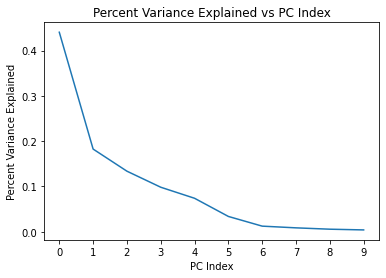

In [168]:
n_components_test=10
pca_data = dru.pca_analysis(
    X,
    n_components=n_components_test,
    plot_sqrt_eigvals=False,
    plot_perc_variance_explained=True
)

X_pca = pca_data["data_proj"]

# a) PCA

In [169]:
sys.path.append('/meshAfterParty/meshAfterParty/')
import datajoint_utils as du
import cell_type_utils as ctu

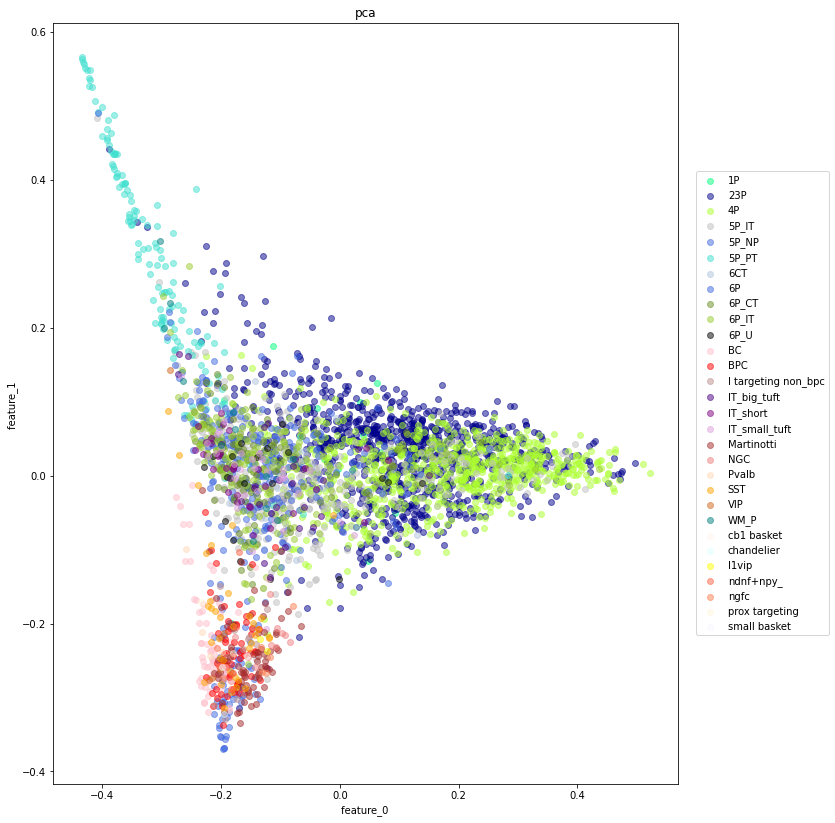

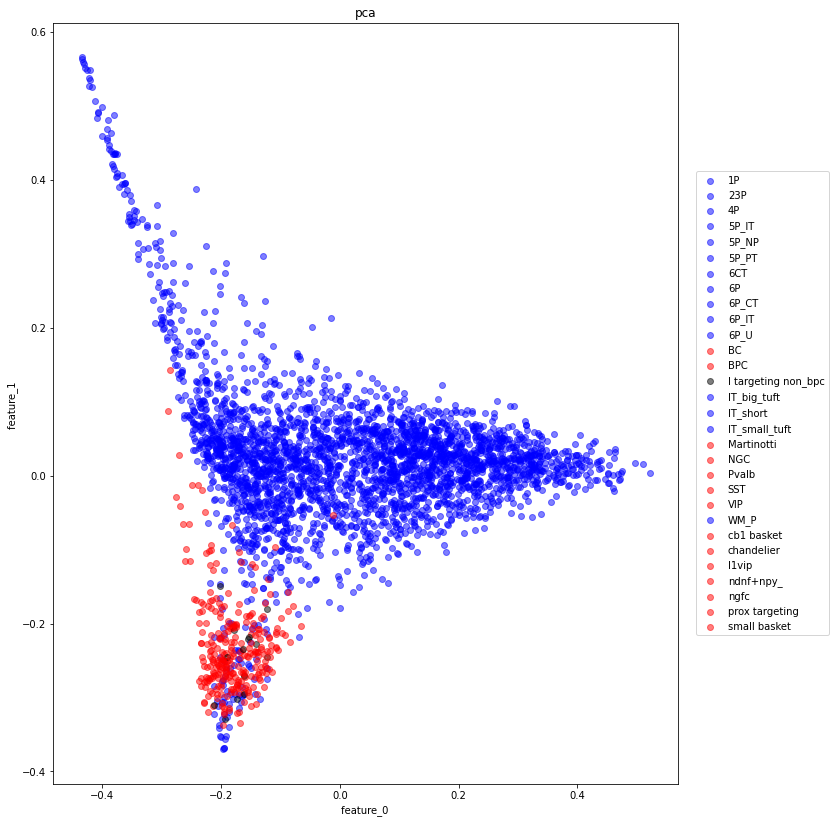

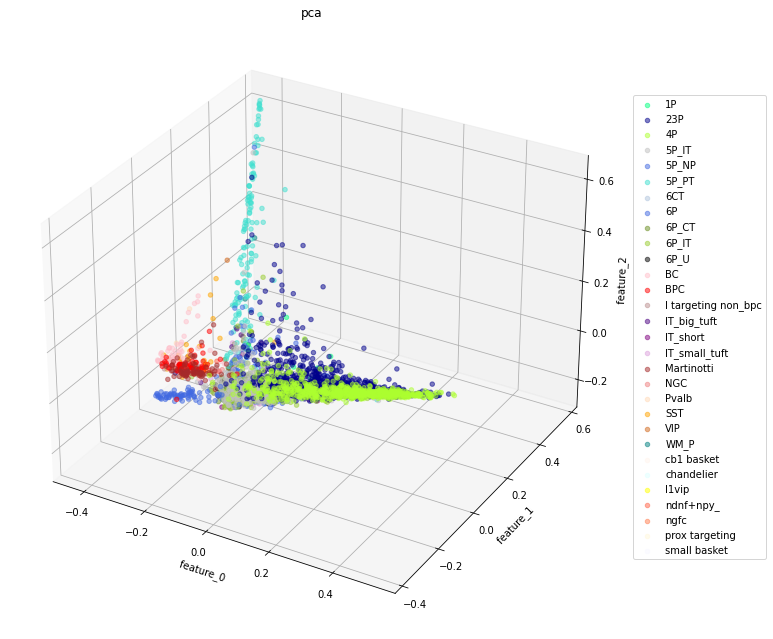

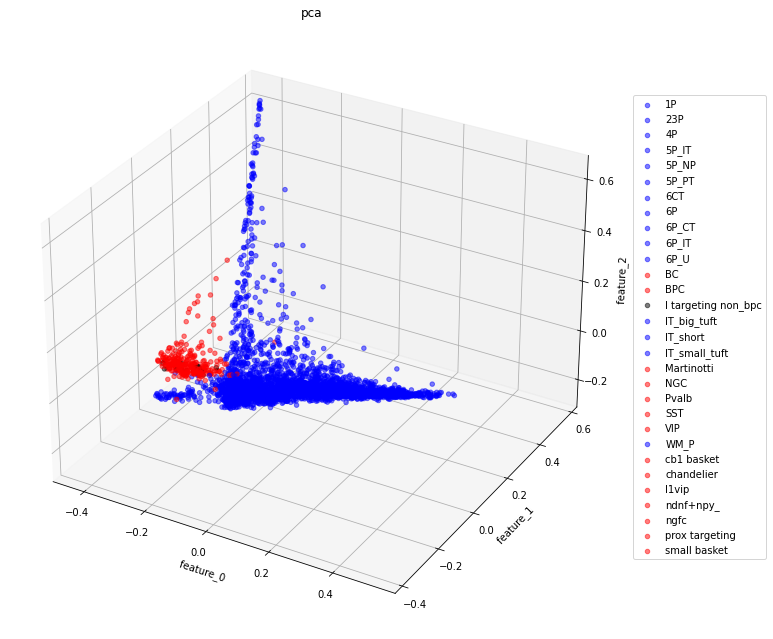

In [170]:
import dimensionality_reduction_ml as dru
import cell_type_utils as ctu
vml.plot_dim_red_analysis(
    X=X_input,
    y=y_input,
    method = "pca",
    color_mapppings = [
        ctu.cell_type_fine_color_map,
        ctu.e_i_color_dict()],
)

# b) UMAP (0.5)

In [171]:
X_trans = dru.dimensionality_reduction_by_method(
        method="UMAP",
        X = X_input,
        n_components =2,
        min_dist = 0.5,
        )

/usr/local/lib/python3.6/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9100. The TBB threading layer is disabled.
  warnings.warn(problem)


In [172]:
method = "UMAP"

<AxesSubplot:title={'center':'UMAP'}, xlabel='feature_0 ', ylabel='feature_1 '>

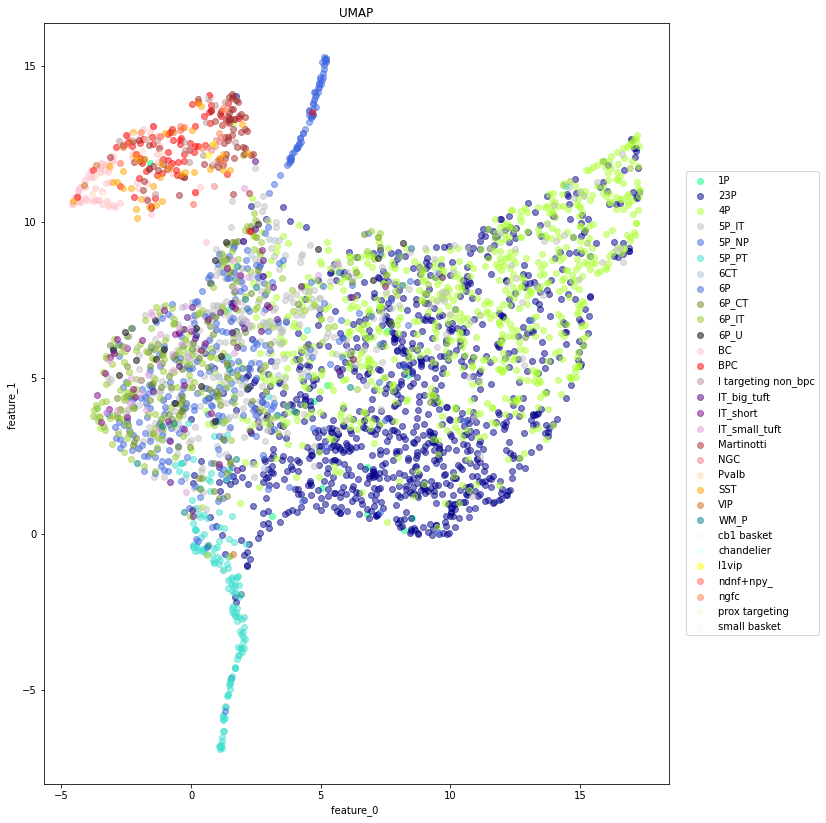

In [173]:
vml.plot_df_scatter_classification(
                X = X_trans,
                y = y_input,
                target_to_color = ctu.cell_type_fine_color_map,
                ndim = 2,
                title=method,
            )

<AxesSubplot:title={'center':'UMAP'}, xlabel='feature_0 ', ylabel='feature_1 '>

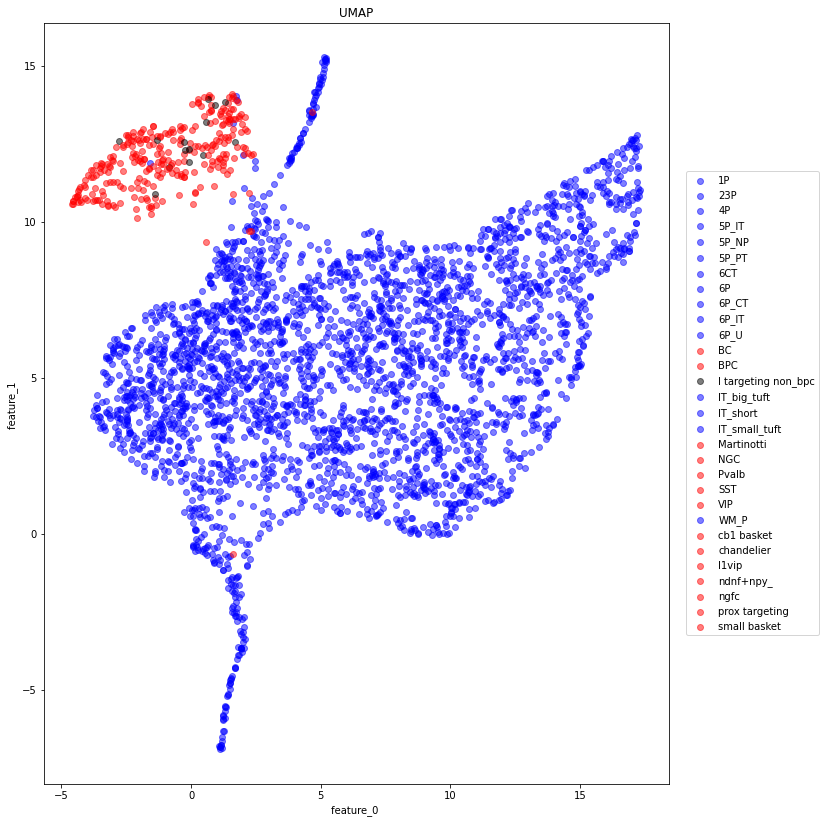

In [174]:
vml.plot_df_scatter_classification(
                X = X_trans,
                y = y_input,
                target_to_color = ctu.e_i_color_dict(),
                ndim = 2,
                title=method,
            )

<AxesSubplot:title={'center':'UMAP'}, xlabel='feature_0 ', ylabel='feature_1 '>

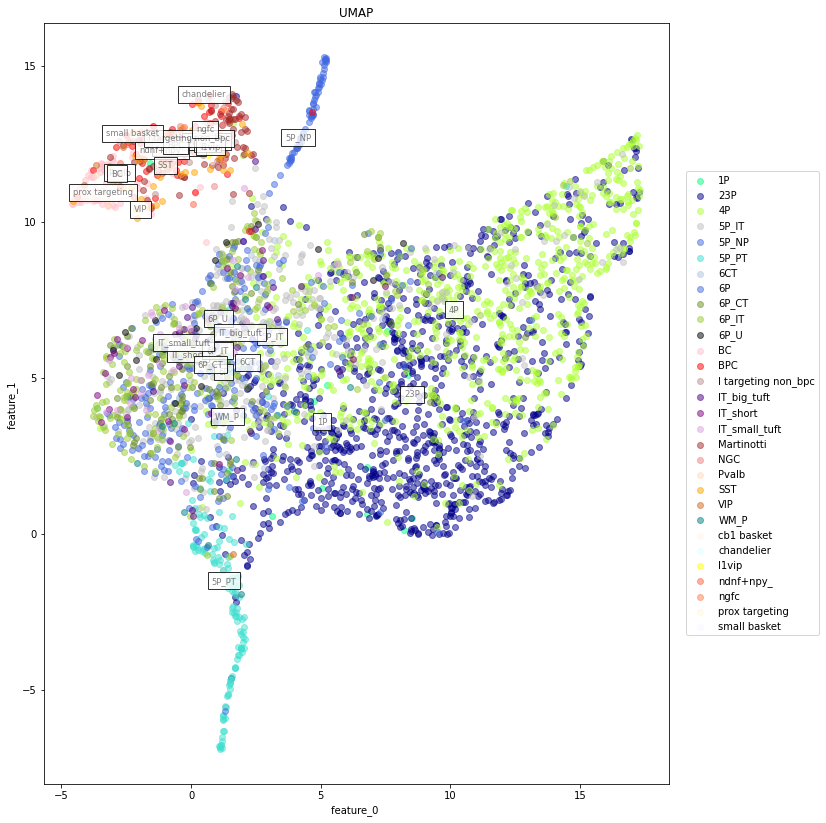

In [175]:
vml.plot_df_scatter_classification(
                X = X_trans,
                y = y_input,
                target_to_color = ctu.cell_type_fine_color_map,
                ndim = 2,
                title=method,
    use_labels_as_text_to_plot=True
            )

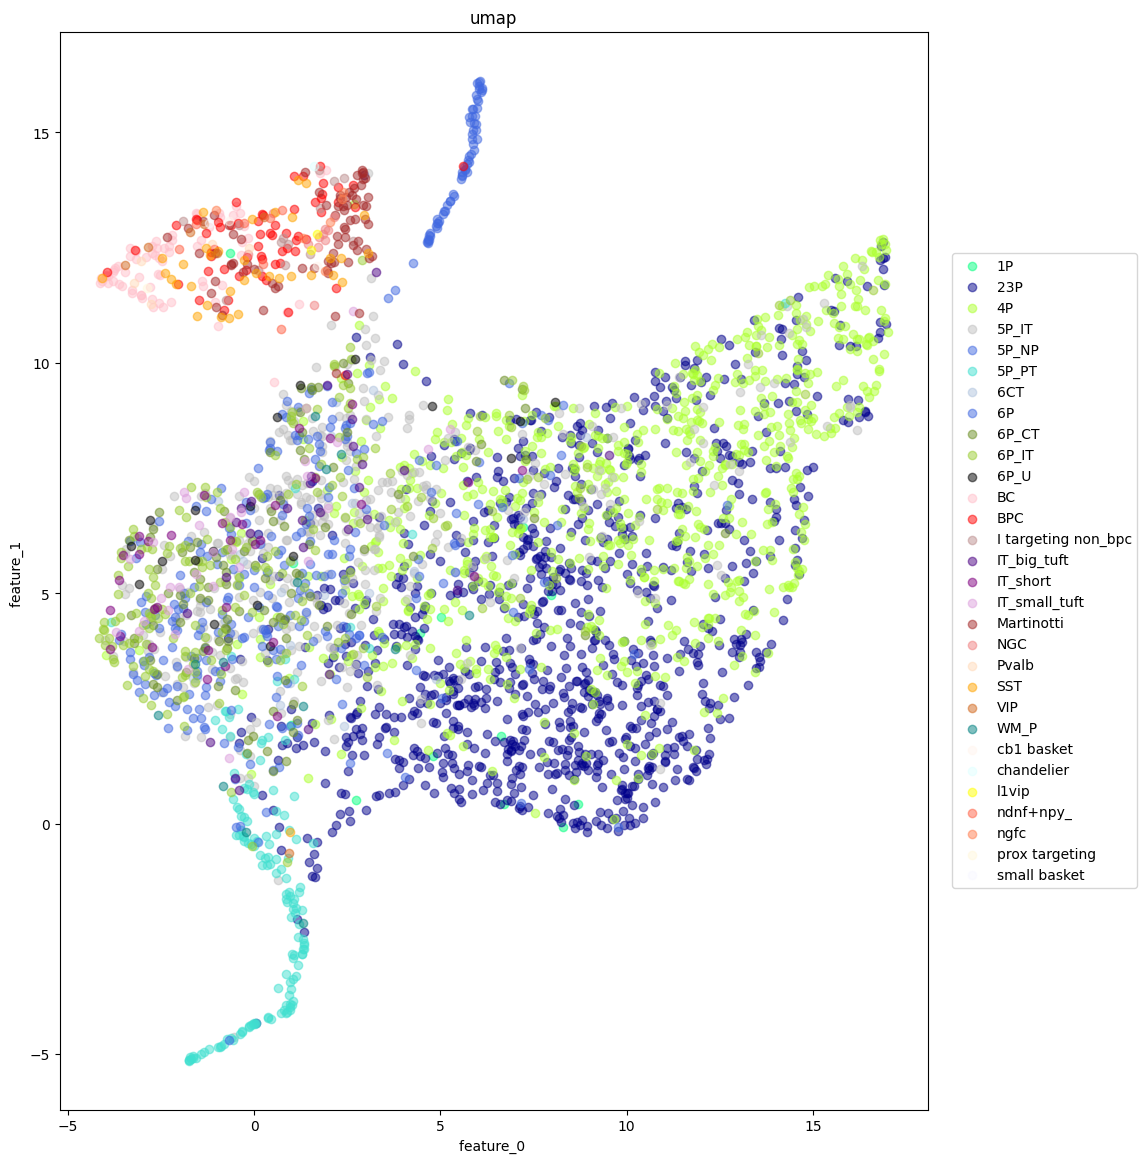

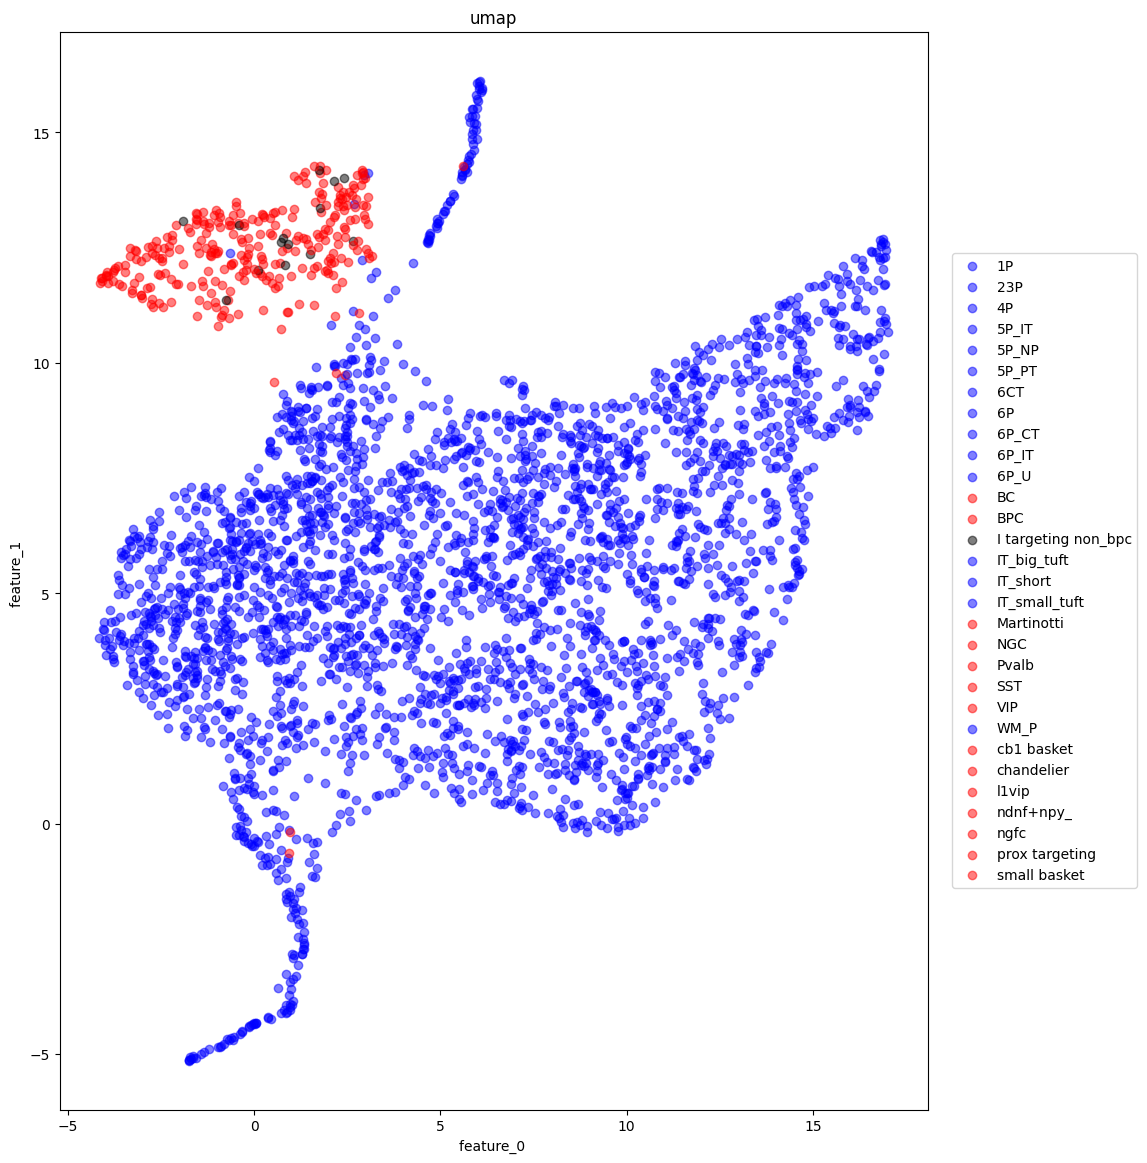

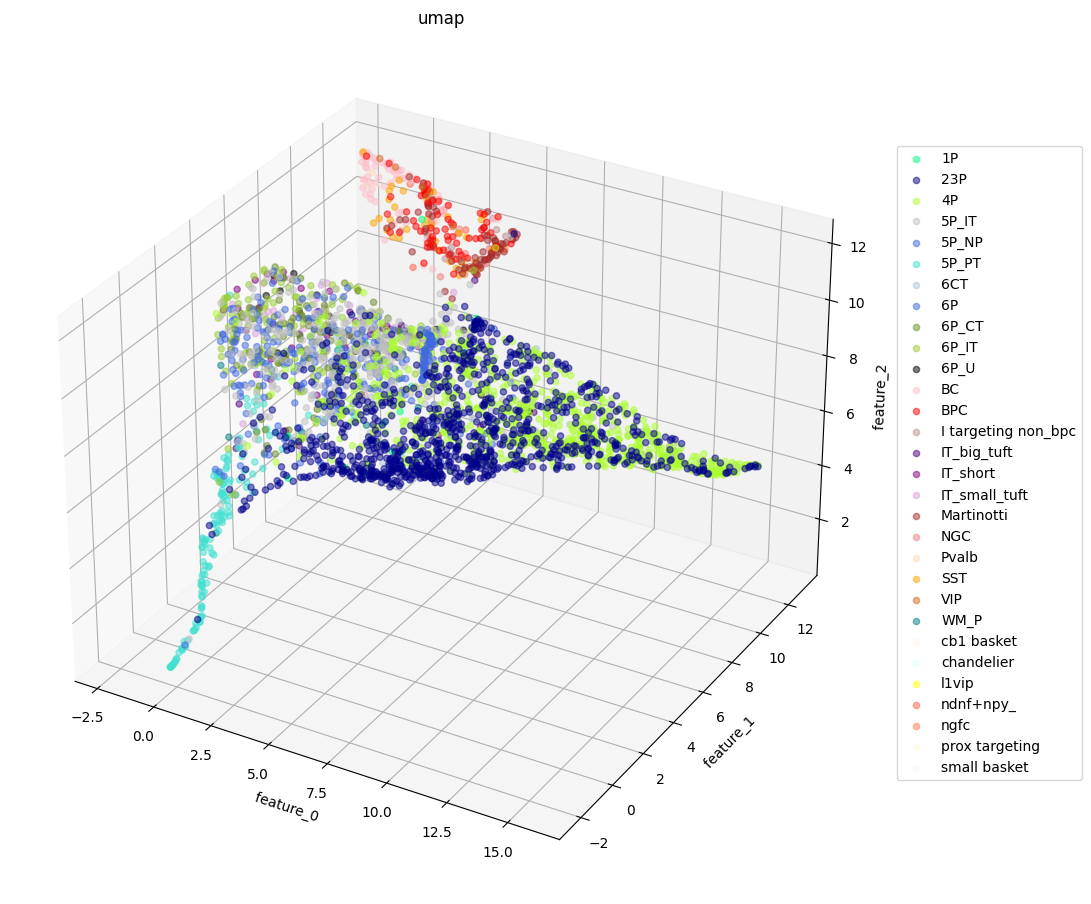

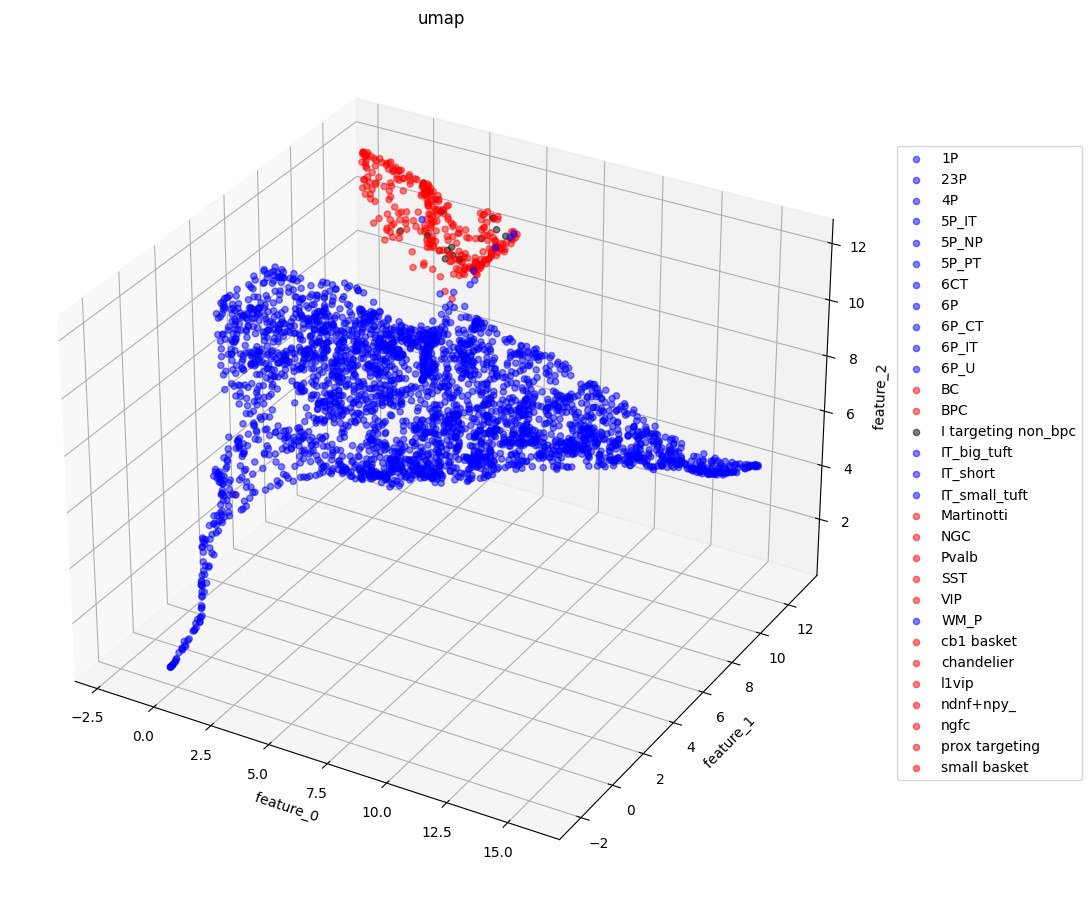

In [176]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

vml.plot_dim_red_analysis(
    X=X_input,
    y=y_input,
    method = "umap",
    color_mapppings = [
        ctu.cell_type_fine_color_map,
        ctu.e_i_color_dict()],
    min_dist = 0.5,
    #plot_kwargs=dict(use_labels_as_text_to_plot = True)
)

# b) UMAP (0.2)

In [177]:
sys.path.append("/meshAfterParty/meshAfterParty/")
import datajoint_utils as du
import cell_type_utils as ctu

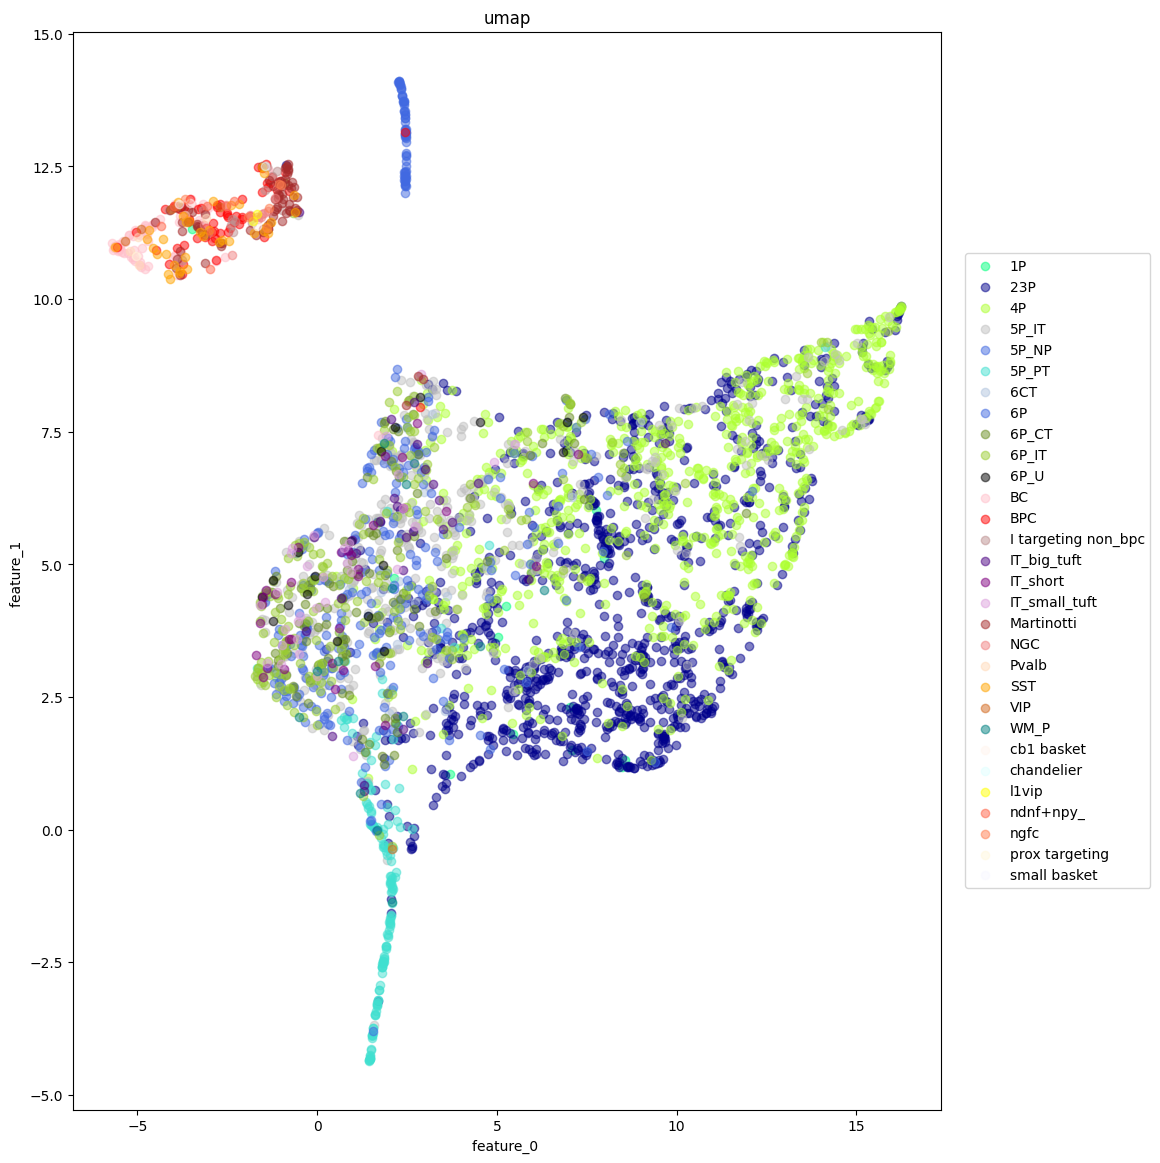

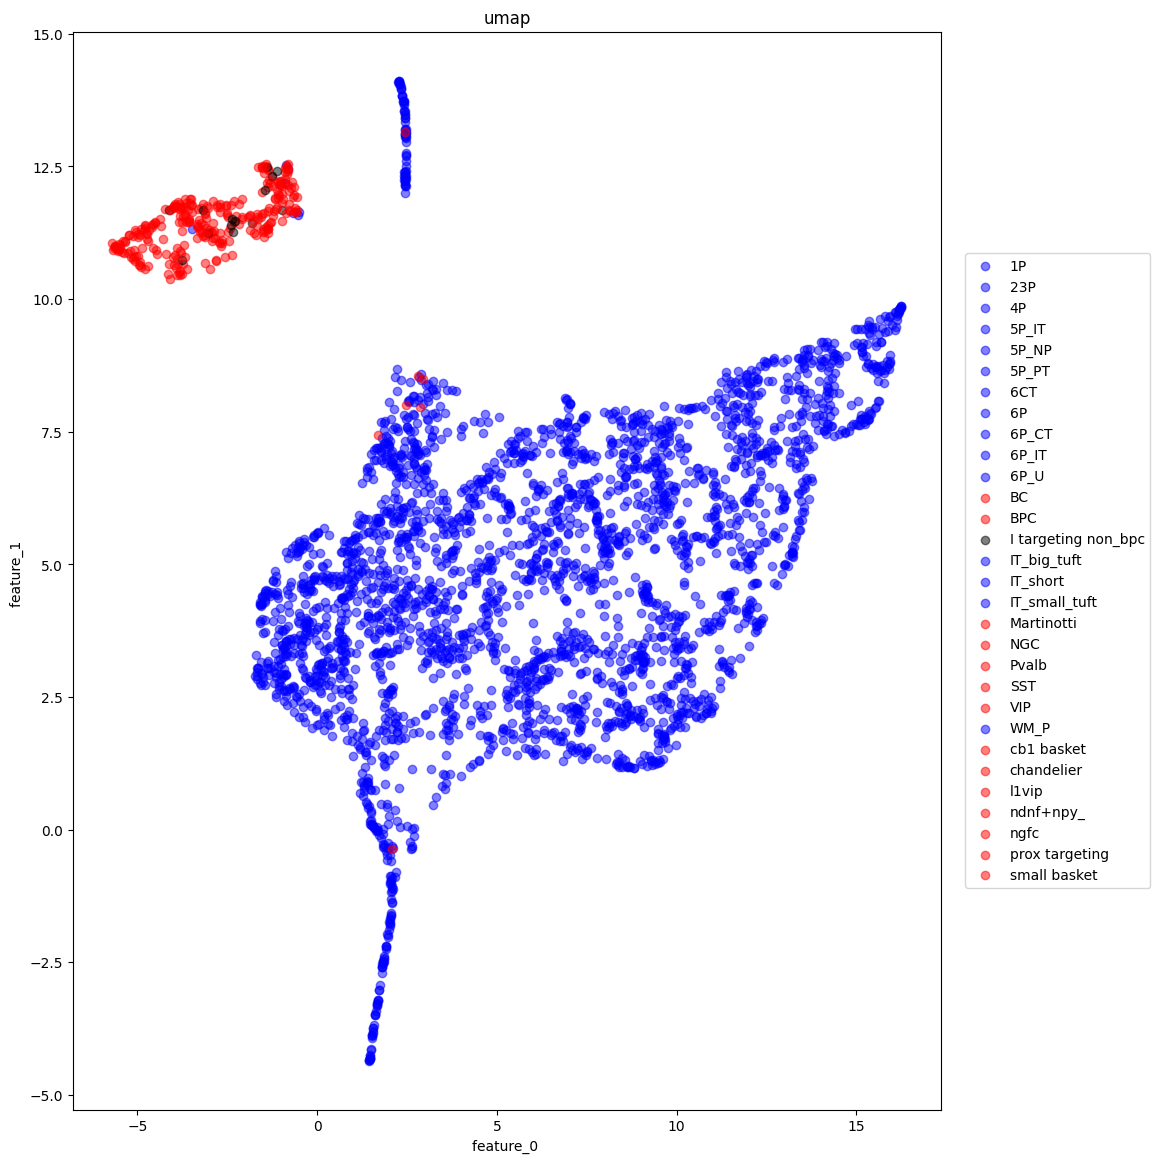

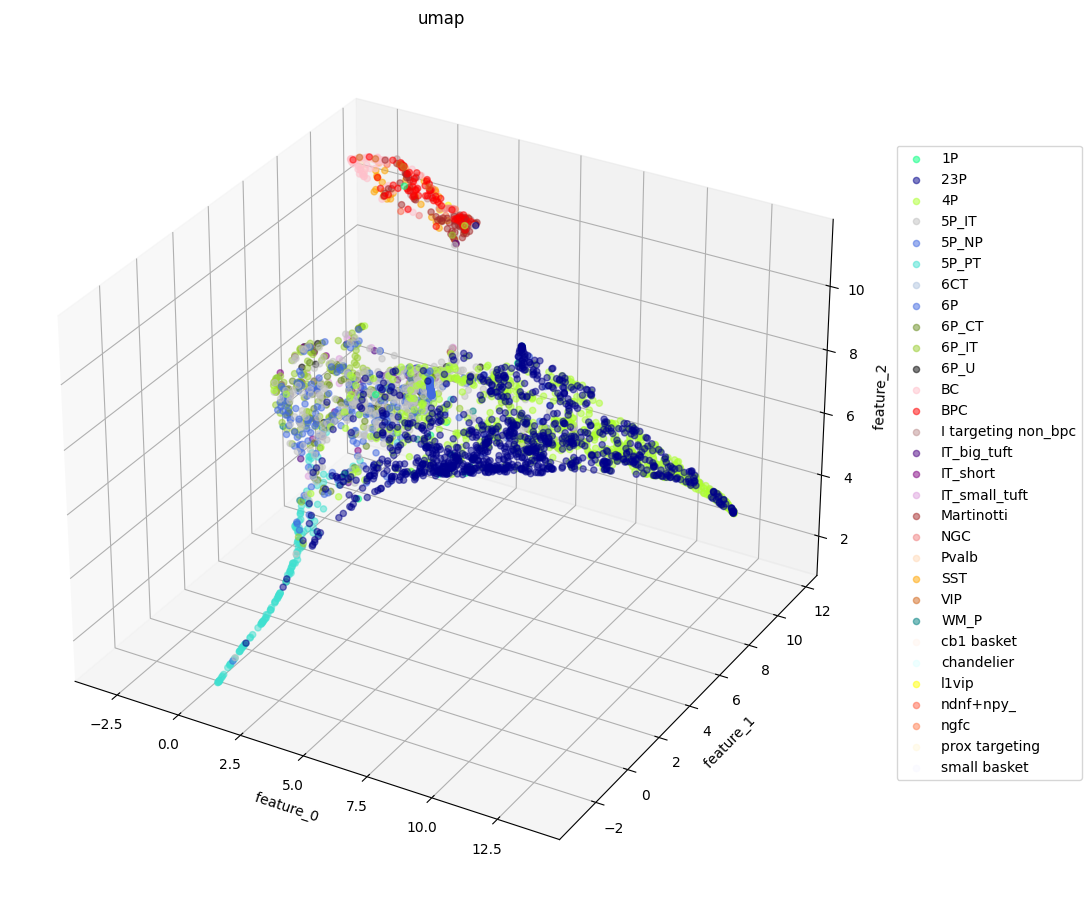

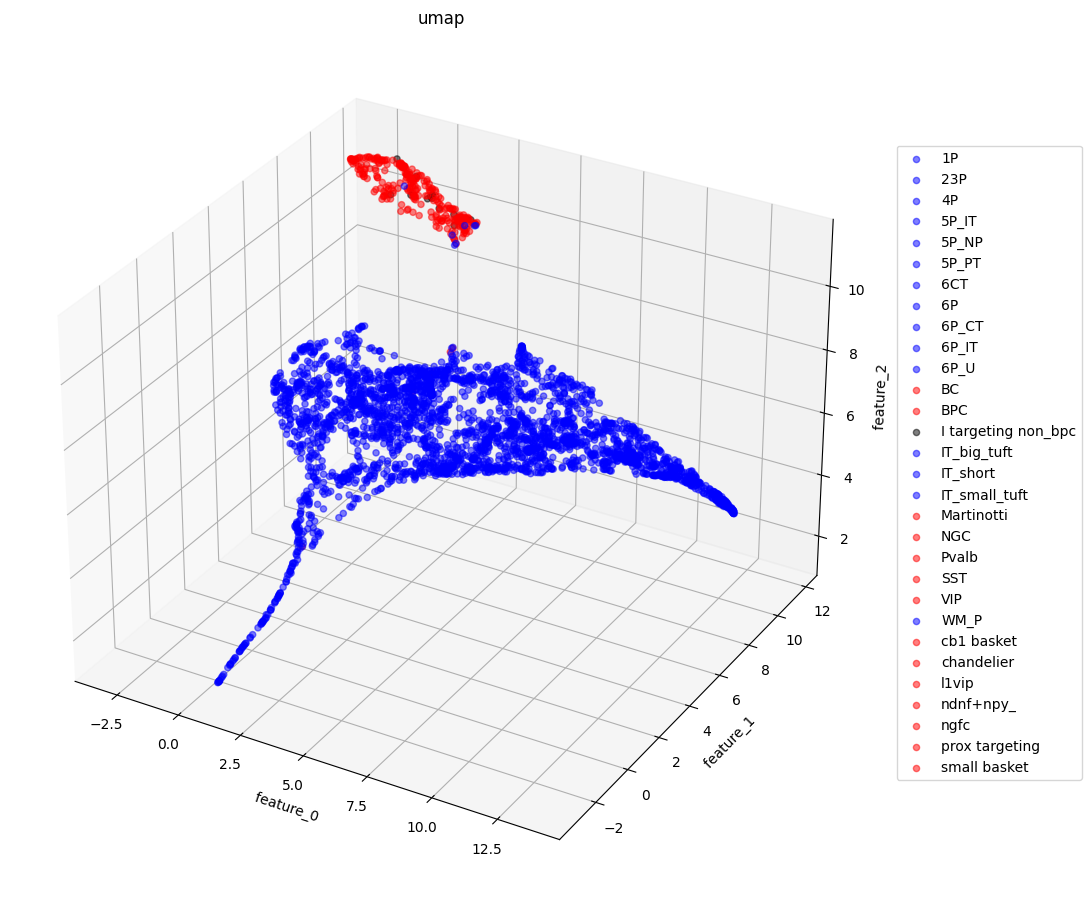

In [178]:
vml.plot_dim_red_analysis(
    X=X_input,
    y=y_input,
    method = "umap",
    color_mapppings = [
        ctu.cell_type_fine_color_map,
        ctu.e_i_color_dict()],
    min_dist = 0.2,
)

# tsne

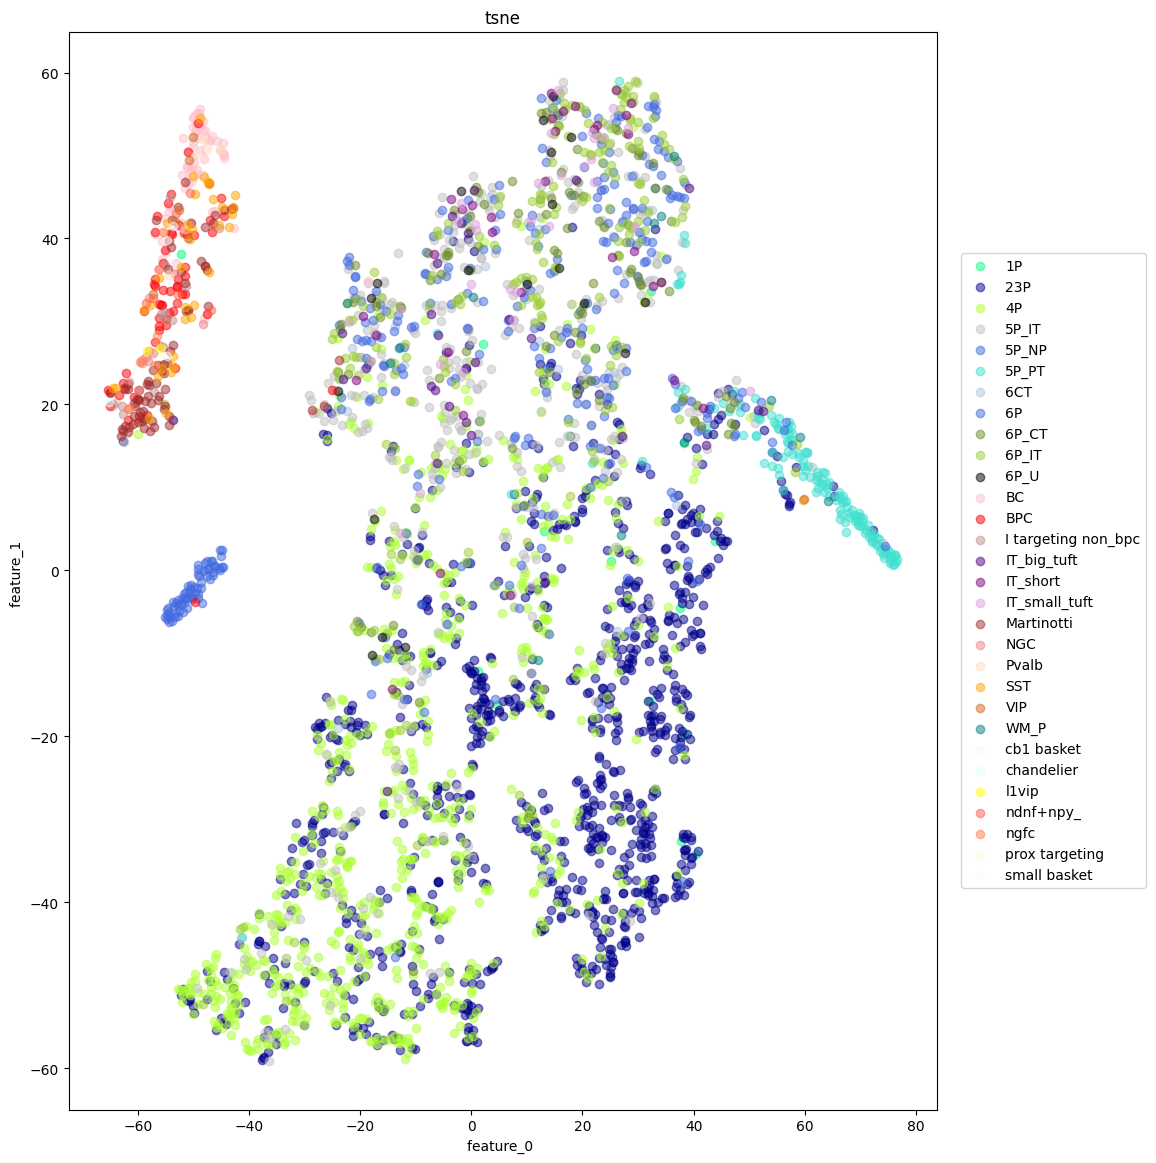

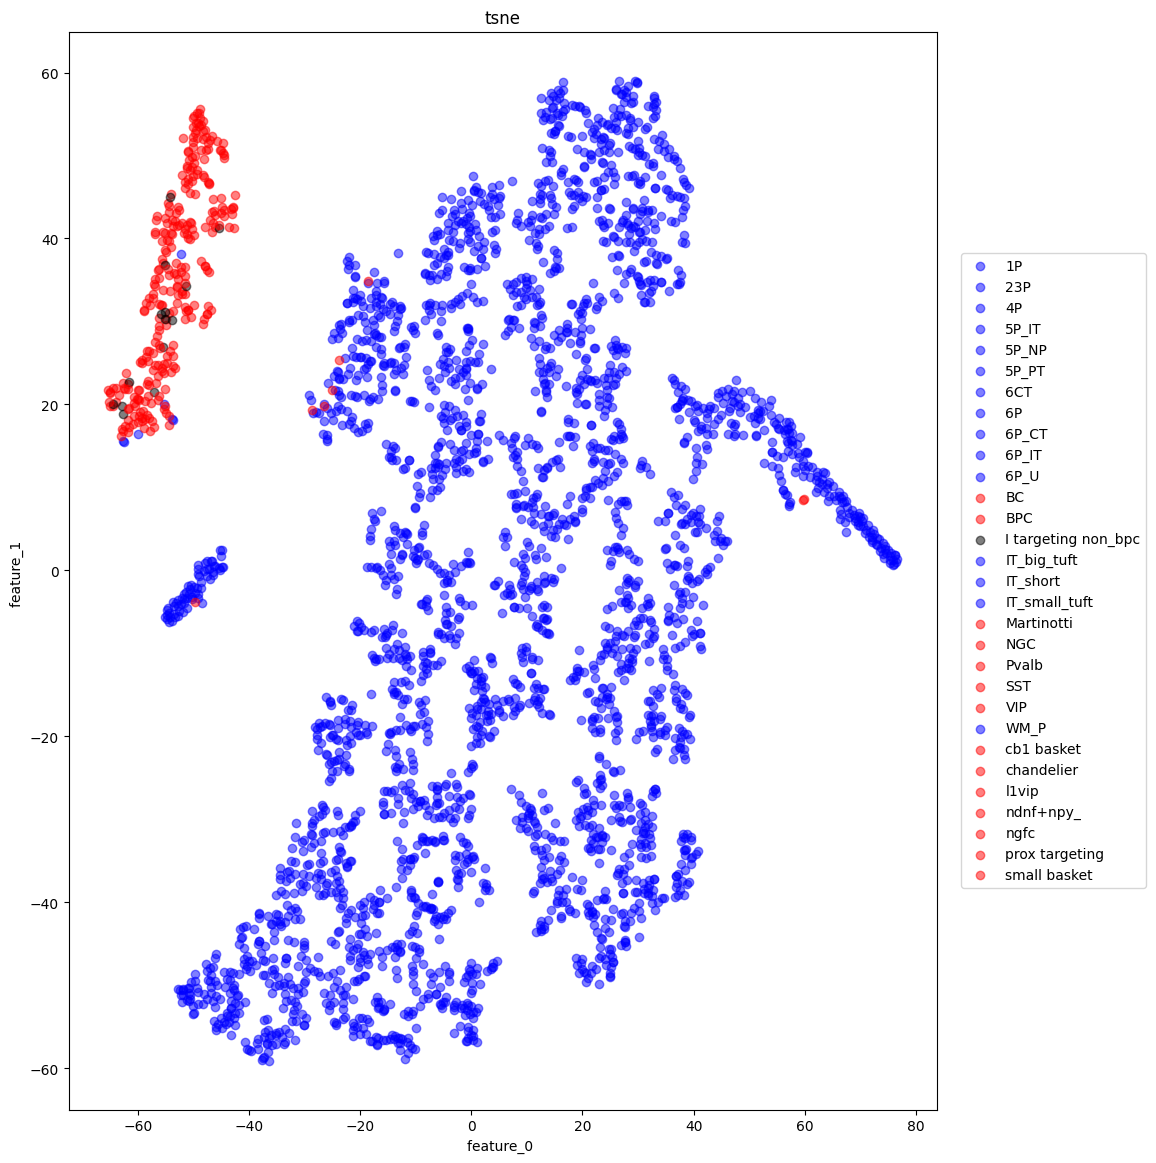

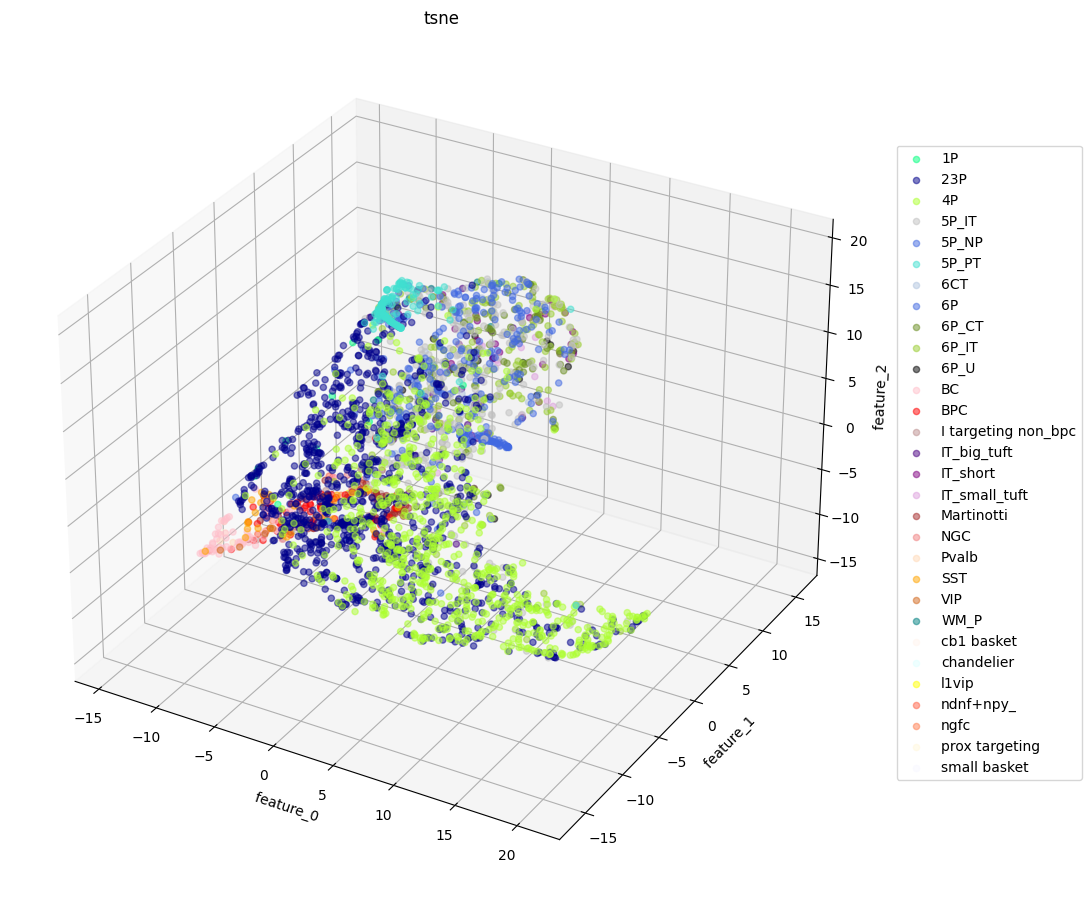

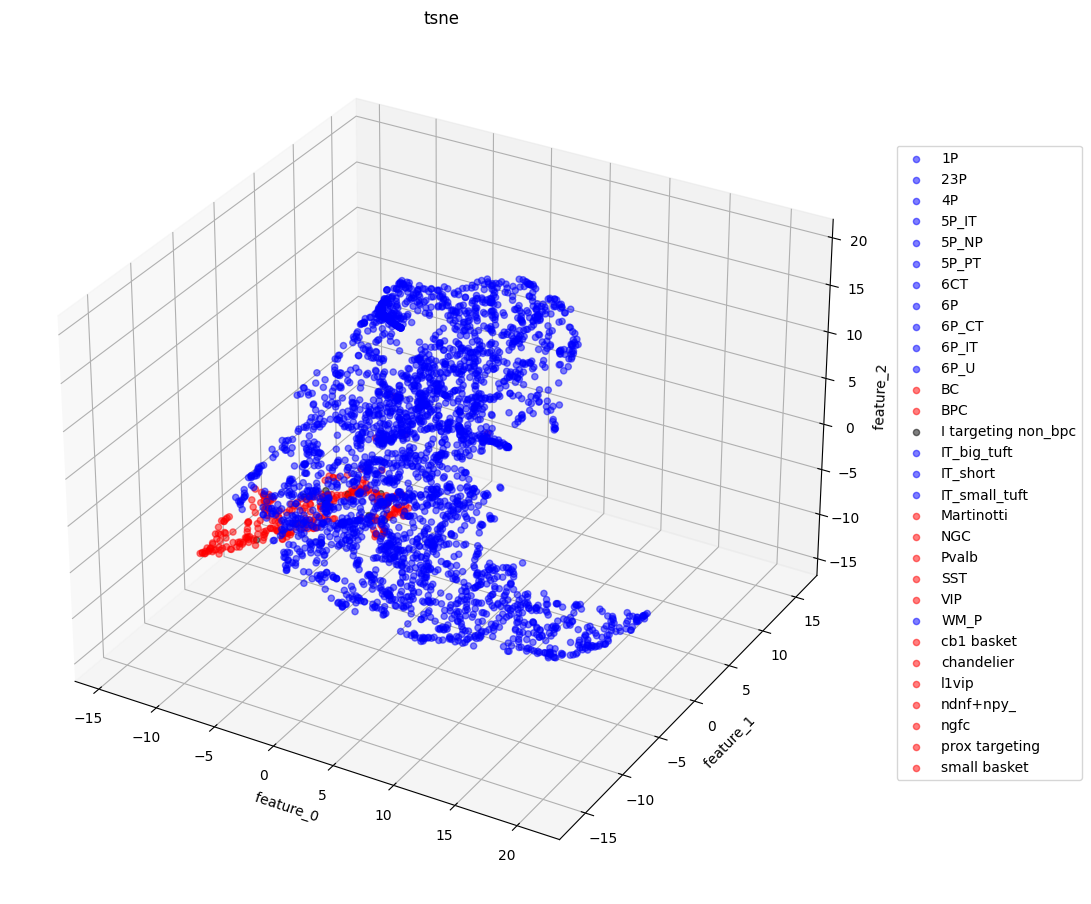

In [179]:
vml.plot_dim_red_analysis(
    X=X_input,
    y=y_input,
    method = "tsne",
    color_mapppings = [
        ctu.cell_type_fine_color_map,
        ctu.e_i_color_dict()],
    #min_dist = 0.2,
)

# Running a Classification and then a confusion matrix

In [180]:
embedding_df

0         1         2         3         4         5         6  \
0     0.003449  0.002624  0.240598  0.527835  0.055190  0.008068  0.000997   
1     0.005092  0.014243  0.344910  0.198907  0.087777  0.006958  0.018560   
2     0.004895  0.023629  0.236181  0.135052  0.111500  0.023667  0.014595   
3     0.001908  0.001092  0.008475  0.017236  0.072428  0.002383  0.026692   
4     0.004599  0.023077  0.374898  0.084893  0.074720  0.004140  0.087545   
...        ...       ...       ...       ...       ...       ...       ...   
3333  0.004524  0.002860  0.128669  0.596710  0.049737  0.001967  0.001957   
3334  0.001945  0.009846  0.005320  0.007842  0.033275  0.010116  0.027114   
3335  0.000990  0.002444  0.002333  0.015243  0.069360  0.553882  0.000813   
3336  0.003318  0.004171  0.020499  0.032118  0.114814  0.008071  0.040852   
3337  0.001968  0.003754  0.005040  0.010016  0.027601  0.006914  0.019320   

             7         8         9  ...        23        24        25  \
0     0.002555  0.022494  0.012184  ...  0.002273  0.001413  0.002330   
1     0.014471  0.085180  0.027308  ...  0.002535  0.009742  0.003196   
2     0.014998  0.087104  0.029740  ...  0.003530  0.010810  0.005634   
3     0.010644  0.255906  0.157766  ...  0.001977  0.003966  0.001045   
4     0.018030  0.071149  0.033587  ...  0.002971  0.011607  0.004262   
...        ...       ...       ...  ...       ...       ...       ...   
3333  0.003976  0.038275  0.007119  ...  0.002021  0.003620  0.001418   
3334  0.003908  0.021622  0.013441  ...  0.009127  0.003035  0.007983   
3335  0.002788  0.040014  0.024260  ...  0.002053  0.002103  0.003460   
3336  0.016702  0.250837  0.119902  ...  0.003517  0.008615  0.002704   
3337  0.001920  0.012740  0.021874  ...  0.015399  0.000935  0.009348   

            26        27        28        29        30        31  cell_type  
0     0.002831  0.003024  0.003975  0.004355  0.002230  0.001884         4P  
1     0.004056  0.004764  0.005338  0.007368  0.003989  0.003065        23P  
2     0.003757  0.007875  0.006869  0.016927  0.004449  0.004825      5P_IT  
3     0.001538  0.000298  0.002071  0.000317  0.003917  0.001103   IT_short  
4     0.003551  0.009160  0.007021  0.015992  0.003830  0.004128        23P  
...        ...       ...       ...       ...       ...       ...        ...  
3333  0.003739  0.000912  0.003016  0.000967  0.003734  0.001506         4P  
3334  0.001419  0.005567  0.008376  0.017405  0.007773  0.009068     Unsure  
3335  0.000751  0.001477  0.002228  0.004508  0.002264  0.002134      5P_NP  
3336  0.002632  0.001280  0.004416  0.001712  0.006136  0.002779         6P  
3337  0.001449  0.005944  0.011561  0.017809  0.008729  0.010206        BPC  

[3338 rows x 33 columns]

In [181]:
import pandas_ml as pdml
df_labeled = embedding_df.query("(cell_type!='Unknown') and (cell_type != 'Unsure')")
X,y = pdml.X_y(df_labeled,"cell_type")
class_label_idx = np.argmax(X.to_numpy(),axis=1)
decoder = {v:k for k,v in cell_type_map.items()}
df_labeled["cell_type_predicted"] = [decoder[k] for k in class_label_idx]
df_labeled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         1         2         3         4         5         6  \
0     0.003449  0.002624  0.240598  0.527835  0.055190  0.008068  0.000997   
1     0.005092  0.014243  0.344910  0.198907  0.087777  0.006958  0.018560   
2     0.004895  0.023629  0.236181  0.135052  0.111500  0.023667  0.014595   
3     0.001908  0.001092  0.008475  0.017236  0.072428  0.002383  0.026692   
4     0.004599  0.023077  0.374898  0.084893  0.074720  0.004140  0.087545   
...        ...       ...       ...       ...       ...       ...       ...   
3332  0.004578  0.006112  0.280393  0.408121  0.072502  0.008045  0.005079   
3333  0.004524  0.002860  0.128669  0.596710  0.049737  0.001967  0.001957   
3335  0.000990  0.002444  0.002333  0.015243  0.069360  0.553882  0.000813   
3336  0.003318  0.004171  0.020499  0.032118  0.114814  0.008071  0.040852   
3337  0.001968  0.003754  0.005040  0.010016  0.027601  0.006914  0.019320   

             7         8         9  ...        24        25        26  \
0     0.002555  0.022494  0.012184  ...  0.001413  0.002330  0.002831   
1     0.014471  0.085180  0.027308  ...  0.009742  0.003196  0.004056   
2     0.014998  0.087104  0.029740  ...  0.010810  0.005634  0.003757   
3     0.010644  0.255906  0.157766  ...  0.003966  0.001045  0.001538   
4     0.018030  0.071149  0.033587  ...  0.011607  0.004262  0.003551   
...        ...       ...       ...  ...       ...       ...       ...   
3332  0.005831  0.037856  0.015054  ...  0.004233  0.003112  0.003739   
3333  0.003976  0.038275  0.007119  ...  0.003620  0.001418  0.003739   
3335  0.002788  0.040014  0.024260  ...  0.002103  0.003460  0.000751   
3336  0.016702  0.250837  0.119902  ...  0.008615  0.002704  0.002632   
3337  0.001920  0.012740  0.021874  ...  0.000935  0.009348  0.001449   

            27        28        29        30        31  cell_type  \
0     0.003024  0.003975  0.004355  0.002230  0.001884         4P   
1     0.004764  0.005338  0.007368  0.003989  0.003065        23P   
2     0.007875  0.006869  0.016927  0.004449  0.004825      5P_IT   
3     0.000298  0.002071  0.000317  0.003917  0.001103   IT_short   
4     0.009160  0.007021  0.015992  0.003830  0.004128        23P   
...        ...       ...       ...       ...       ...        ...   
3332  0.003994  0.004877  0.005835  0.003283  0.002487         4P   
3333  0.000912  0.003016  0.000967  0.003734  0.001506         4P   
3335  0.001477  0.002228  0.004508  0.002264  0.002134      5P_NP   
3336  0.001280  0.004416  0.001712  0.006136  0.002779         6P   
3337  0.005944  0.011561  0.017809  0.008729  0.010206        BPC   

      cell_type_predicted  
0                      4P  
1                     23P  
2                     23P  
3                      6P  
4                     23P  
...                   ...  
3332                   4P  
3333                   4P  
3335                5P_NP  
3336                   6P  
3337                  BPC  

[3318 rows x 34 columns]

In [182]:
accuracy = len(df_labeled.query("cell_type == cell_type_predicted"))/len(df_labeled)
accuracy

0.5060277275467149

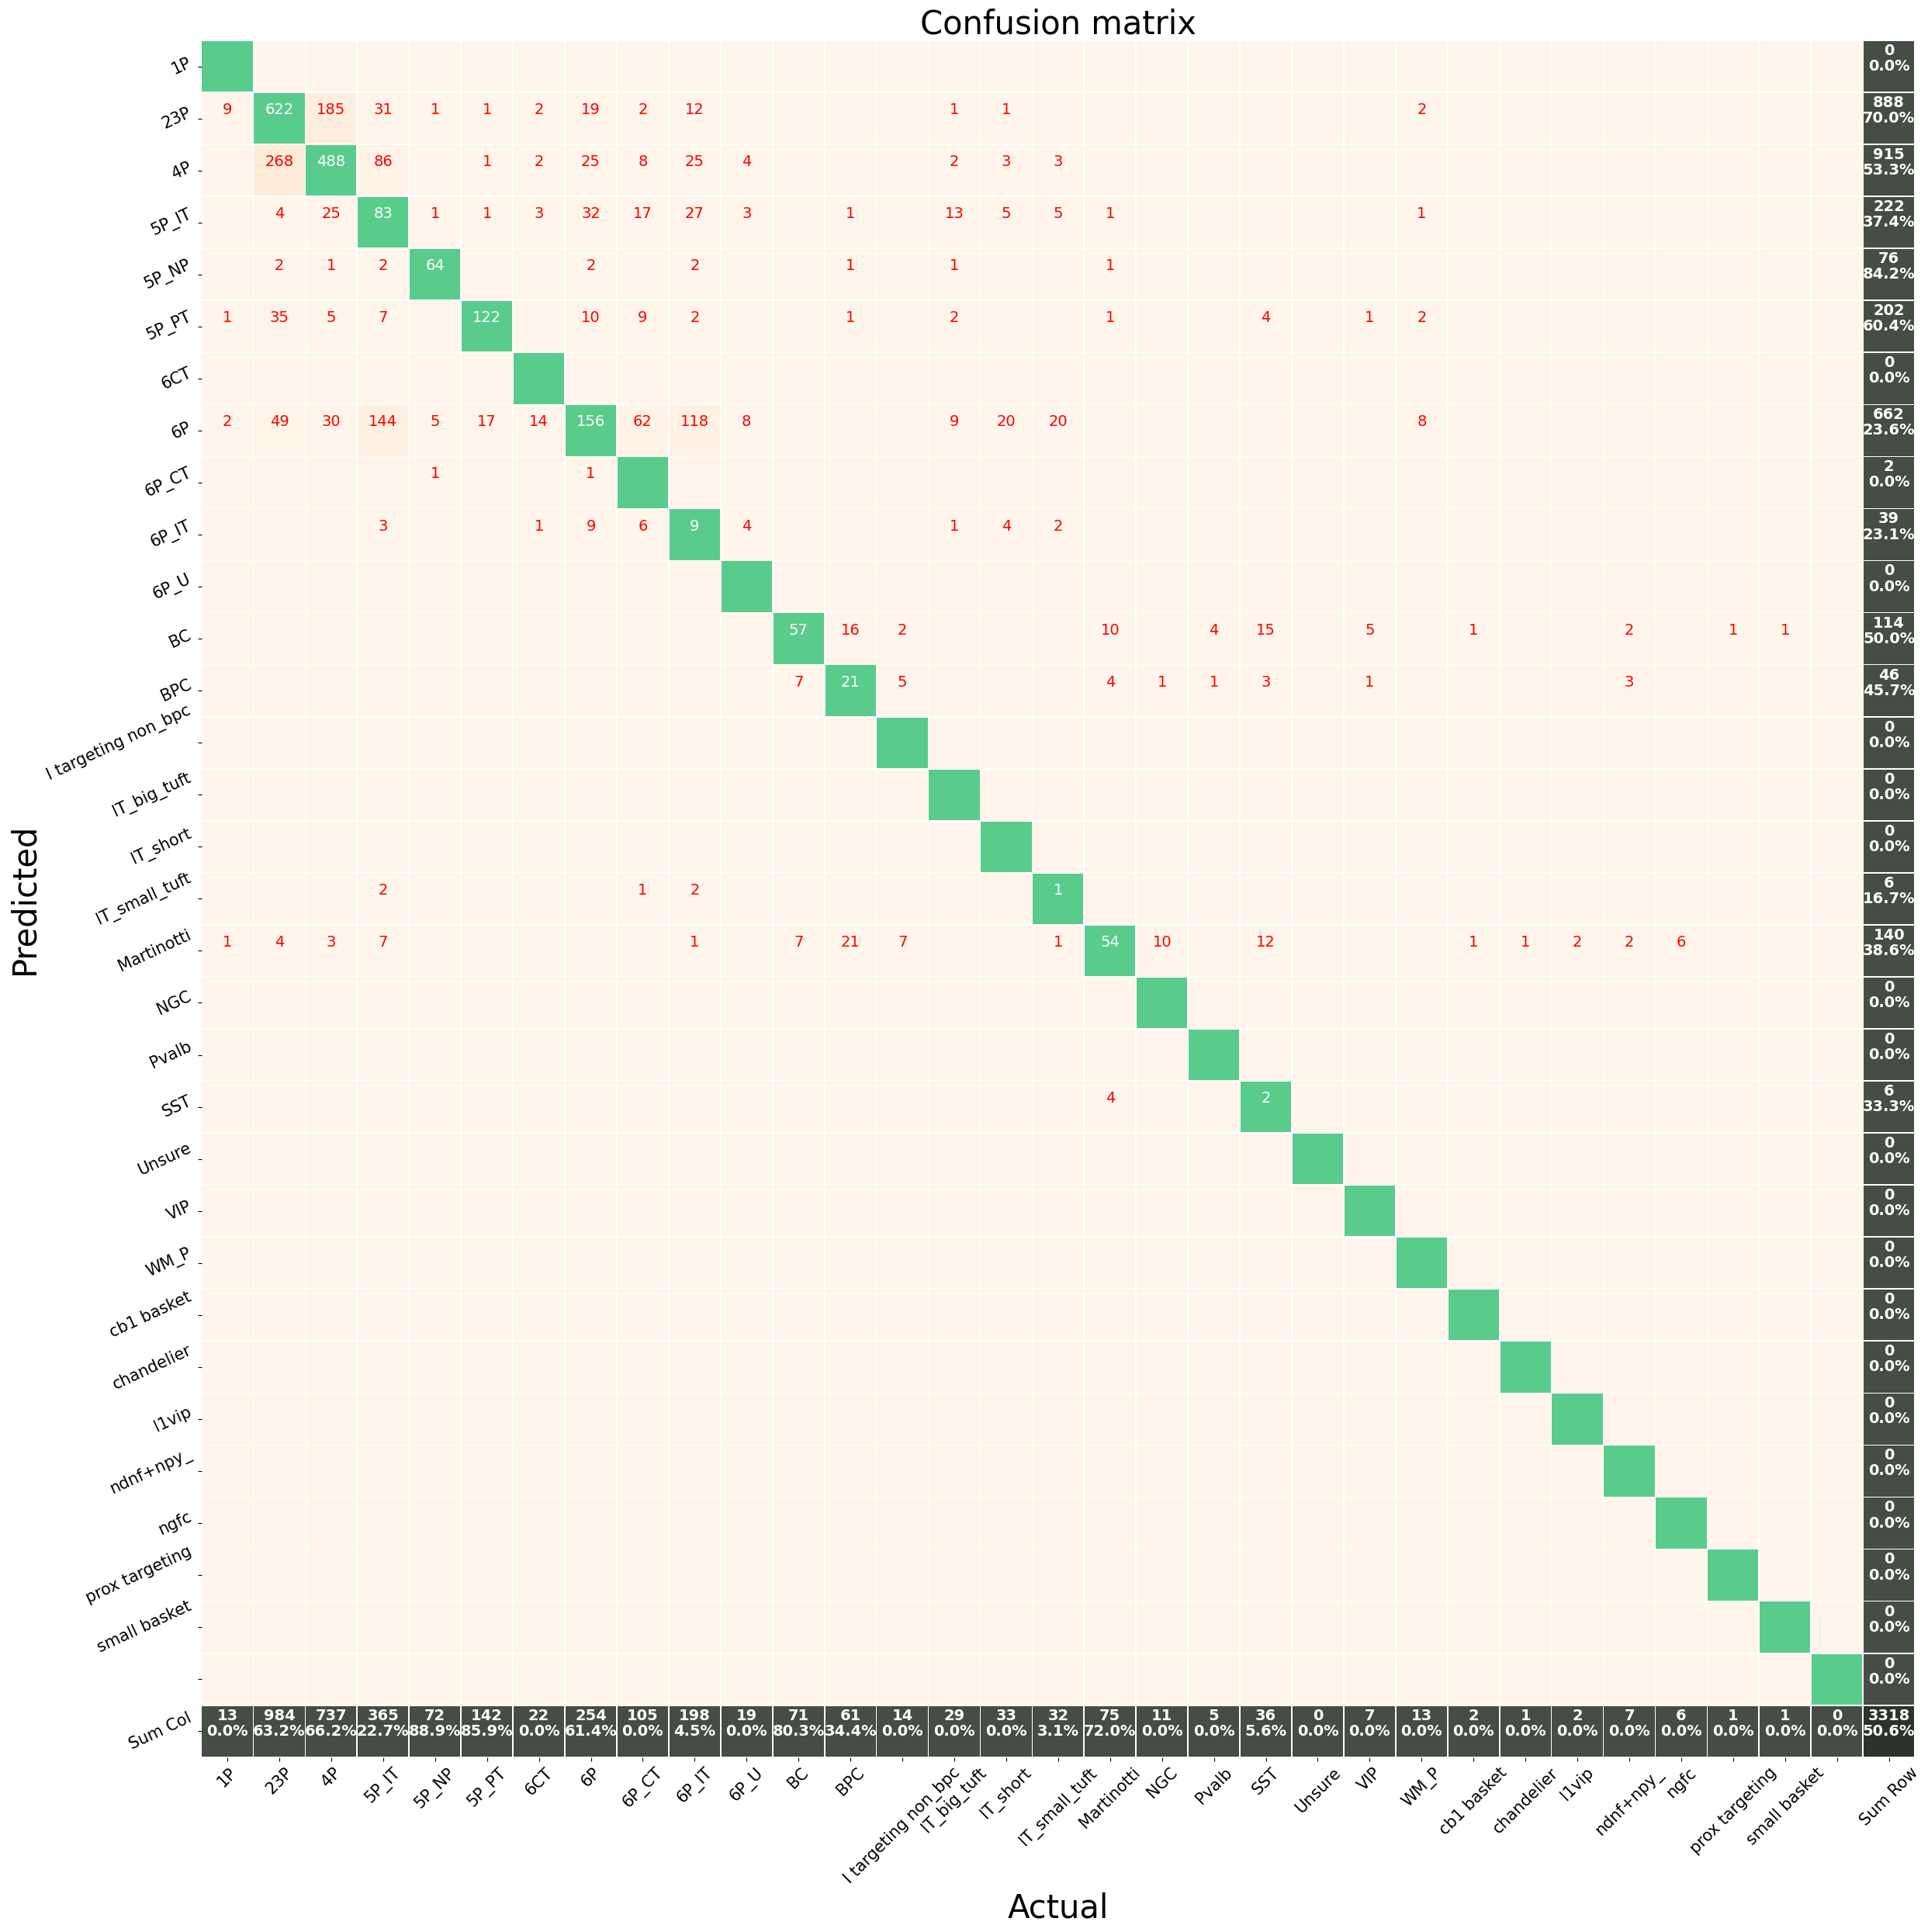

In [183]:
import statistics_visualizations as sviz
sviz.plot_pretty_confusion_matrix(
    y_true = df_labeled["cell_type"],
    y_pred = df_labeled["cell_type_predicted"],
    labels = list(cell_type_map.keys()),
    figsize=(25,25),
    cell_fontsize = 14,
    ticklabel_fontsize=15)

# Confusion matrix of EI

In [184]:
df_labeled["e_i_label"] = [ctu.e_i_label_from_cell_type_fine(k) for k in df_labeled["cell_type"].to_numpy()]
df_labeled["e_i_predicted"] = [ctu.e_i_label_from_cell_type_fine(k) for k in df_labeled["cell_type_predicted"].to_numpy()]
df_labeled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         1         2         3         4         5         6  \
0     0.003449  0.002624  0.240598  0.527835  0.055190  0.008068  0.000997   
1     0.005092  0.014243  0.344910  0.198907  0.087777  0.006958  0.018560   
2     0.004895  0.023629  0.236181  0.135052  0.111500  0.023667  0.014595   
3     0.001908  0.001092  0.008475  0.017236  0.072428  0.002383  0.026692   
4     0.004599  0.023077  0.374898  0.084893  0.074720  0.004140  0.087545   
...        ...       ...       ...       ...       ...       ...       ...   
3332  0.004578  0.006112  0.280393  0.408121  0.072502  0.008045  0.005079   
3333  0.004524  0.002860  0.128669  0.596710  0.049737  0.001967  0.001957   
3335  0.000990  0.002444  0.002333  0.015243  0.069360  0.553882  0.000813   
3336  0.003318  0.004171  0.020499  0.032118  0.114814  0.008071  0.040852   
3337  0.001968  0.003754  0.005040  0.010016  0.027601  0.006914  0.019320   

             7         8         9  ...        26        27        28  \
0     0.002555  0.022494  0.012184  ...  0.002831  0.003024  0.003975   
1     0.014471  0.085180  0.027308  ...  0.004056  0.004764  0.005338   
2     0.014998  0.087104  0.029740  ...  0.003757  0.007875  0.006869   
3     0.010644  0.255906  0.157766  ...  0.001538  0.000298  0.002071   
4     0.018030  0.071149  0.033587  ...  0.003551  0.009160  0.007021   
...        ...       ...       ...  ...       ...       ...       ...   
3332  0.005831  0.037856  0.015054  ...  0.003739  0.003994  0.004877   
3333  0.003976  0.038275  0.007119  ...  0.003739  0.000912  0.003016   
3335  0.002788  0.040014  0.024260  ...  0.000751  0.001477  0.002228   
3336  0.016702  0.250837  0.119902  ...  0.002632  0.001280  0.004416   
3337  0.001920  0.012740  0.021874  ...  0.001449  0.005944  0.011561   

            29        30        31  cell_type  cell_type_predicted  \
0     0.004355  0.002230  0.001884         4P                   4P   
1     0.007368  0.003989  0.003065        23P                  23P   
2     0.016927  0.004449  0.004825      5P_IT                  23P   
3     0.000317  0.003917  0.001103   IT_short                   6P   
4     0.015992  0.003830  0.004128        23P                  23P   
...        ...       ...       ...        ...                  ...   
3332  0.005835  0.003283  0.002487         4P                   4P   
3333  0.000967  0.003734  0.001506         4P                   4P   
3335  0.004508  0.002264  0.002134      5P_NP                5P_NP   
3336  0.001712  0.006136  0.002779         6P                   6P   
3337  0.017809  0.008729  0.010206        BPC                  BPC   

       e_i_label  e_i_predicted  
0     excitatory     excitatory  
1     excitatory     excitatory  
2     excitatory     excitatory  
3     excitatory     excitatory  
4     excitatory     excitatory  
...          ...            ...  
3332  excitatory     excitatory  
3333  excitatory     excitatory  
3335  excitatory     excitatory  
3336  excitatory     excitatory  
3337  inhibitory     inhibitory  

[3318 rows x 36 columns]

In [185]:
df_labeled_filt = df_labeled.query("e_i_label != 'unknown'")

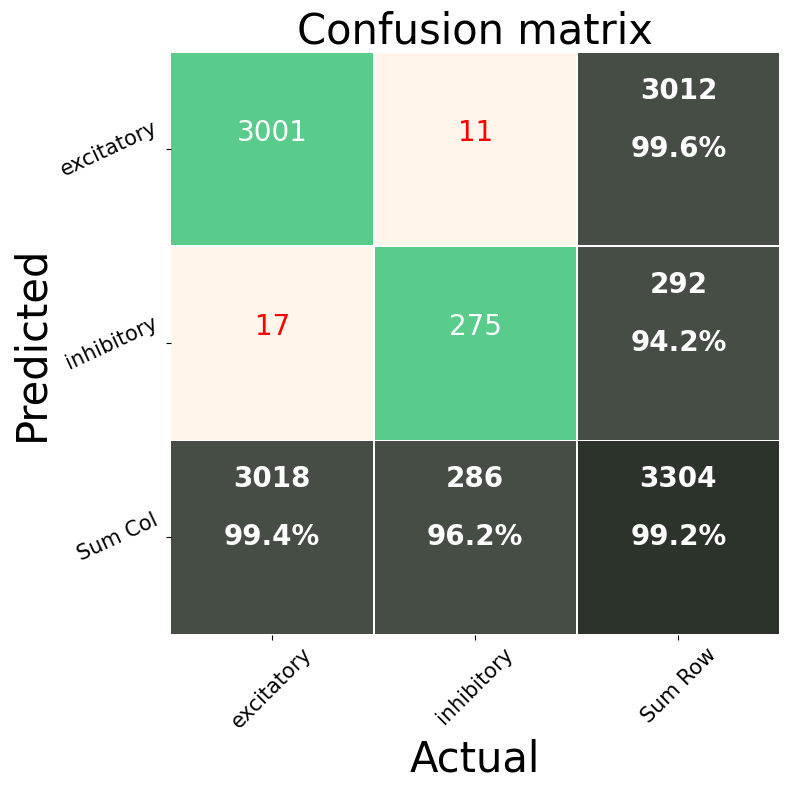

In [186]:
import statistics_visualizations as sviz
sviz.plot_pretty_confusion_matrix(
    y_true = df_labeled["e_i_label"],
    y_pred = df_labeled["e_i_predicted"],
    labels = list(df_labeled_filt["e_i_label"].unique()),
    figsize=(8,8),
    #cell_fontsize = 15,
    #ticklabel_fontsize=15
)

# Computing the Test Accuracy

In [191]:
all_data_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle = False)
all_data_loader

model.eval()
embeddings = []
labels = []
for data in tqdm(all_data_loader):#train_loader:  # Iterate in batches over the training dataset.
    
    X,y = data
    X = X.to(device)
    y = y.to(device)
    if model_name == "DiffPool":
            out,gnn_loss, cluster_loss = model(data)  # Perform a single forward pass.
            #y_true = data.y.reshape(-1,3)
    elif model_name == "TreeLSTM":
        n = data.x.shape[0]
        h = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
        c = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
        out = model(
            data,
            h = h,
            c = c,
            embeddings = data.x
            )
    else:
        out = model(X)

    out_array = out.detach().cpu().numpy()
    out_labels = y.numpy().reshape(-1)
    #print(f"out_array.shape = {out_array.shape}, out_labels.shape = {out_labels.shape}")
    
#     if out_array.shape[0] != out_labels.shape[0]:
#         raise Exception("")
    
    embeddings.append(out_array)
    labels.append(out_labels)
    
    
    
embeddings = np.vstack(embeddings)
labels = np.hstack(labels)

embedding_df = pd.DataFrame(embeddings)
embedding_df["cell_type"] = labels

import general_utils as gu
decoder_map = dict([(v,k) if k is not None else (v,"Unknown") for k,v in cell_type_map.items()])

import pandas_utils as pu
embedding_df["cell_type"] = pu.new_column_from_dict_mapping(embedding_df,decoder_map,column_name = "cell_type")

import pandas_ml as pdml
df_labeled = embedding_df.query("(cell_type!='Unknown') and (cell_type != 'Unsure')")
X,y = pdml.X_y(df_labeled,"cell_type")
class_label_idx = np.argmax(X.to_numpy(),axis=1)
decoder = {v:k for k,v in cell_type_map.items()}
df_labeled["cell_type_predicted"] = [decoder[k] for k in class_label_idx]
df_labeled["e_i_label"] = [ctu.e_i_label_from_cell_type_fine(k) for k in df_labeled["cell_type"].to_numpy()]
df_labeled["e_i_predicted"] = [ctu.e_i_label_from_cell_type_fine(k) for k in df_labeled["cell_type_predicted"].to_numpy()]

accuracy = len(df_labeled.query("cell_type == cell_type_predicted"))/len(df_labeled)
print(f"cell_type_fine test accuracy: {accuracy}")
accuracy = len(df_labeled.query("e_i_label == e_i_predicted"))/len(df_labeled)
print(f"e_i_label test accuracy: {accuracy}")

  0%|          | 0/11 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


cell_type_fine test accuracy: 0.4842105263157895
e_i_label test accuracy: 0.9894736842105263


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [192]:
all_data_loader = DataLoader(val_dataset, batch_size=batch_size,shuffle = False)
all_data_loader

model.eval()
embeddings = []
labels = []
for data in tqdm(all_data_loader):#train_loader:  # Iterate in batches over the training dataset.
    
    X,y = data
    X = X.to(device)
    y = y.to(device)
    if model_name == "DiffPool":
            out,gnn_loss, cluster_loss = model(data)  # Perform a single forward pass.
            #y_true = data.y.reshape(-1,3)
    elif model_name == "TreeLSTM":
        n = data.x.shape[0]
        h = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
        c = torch.zeros((n, architecture_kwargs["n_hidden_channels"]))
        out = model(
            data,
            h = h,
            c = c,
            embeddings = data.x
            )
    else:
        out = model(X)

    out_array = out.detach().cpu().numpy()
    out_labels = y.numpy().reshape(-1)
    #print(f"out_array.shape = {out_array.shape}, out_labels.shape = {out_labels.shape}")
    
#     if out_array.shape[0] != out_labels.shape[0]:
#         raise Exception("")
    
    embeddings.append(out_array)
    labels.append(out_labels)
    
    
    
embeddings = np.vstack(embeddings)
labels = np.hstack(labels)

embedding_df = pd.DataFrame(embeddings)
embedding_df["cell_type"] = labels

import general_utils as gu
decoder_map = dict([(v,k) if k is not None else (v,"Unknown") for k,v in cell_type_map.items()])

import pandas_utils as pu
embedding_df["cell_type"] = pu.new_column_from_dict_mapping(embedding_df,decoder_map,column_name = "cell_type")

import pandas_ml as pdml
df_labeled = embedding_df.query("(cell_type!='Unknown') and (cell_type != 'Unsure')")
X,y = pdml.X_y(df_labeled,"cell_type")
class_label_idx = np.argmax(X.to_numpy(),axis=1)
decoder = {v:k for k,v in cell_type_map.items()}
df_labeled["cell_type_predicted"] = [decoder[k] for k in class_label_idx]
df_labeled["e_i_label"] = [ctu.e_i_label_from_cell_type_fine(k) for k in df_labeled["cell_type"].to_numpy()]
df_labeled["e_i_predicted"] = [ctu.e_i_label_from_cell_type_fine(k) for k in df_labeled["cell_type_predicted"].to_numpy()]

accuracy = len(df_labeled.query("cell_type == cell_type_predicted"))/len(df_labeled)
print(f"cell_type_fine test accuracy: {accuracy}")
accuracy = len(df_labeled.query("e_i_label == e_i_predicted"))/len(df_labeled)
print(f"e_i_label test accuracy: {accuracy}")

  0%|          | 0/11 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


cell_type_fine test accuracy: 0.48717948717948717
e_i_label test accuracy: 0.9819004524886877


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
